# **Walmart's Customer Analysis**

This notebook serves as the **second capstone project** of Job Connector-Data Science and Machine Learning program at Purwadhika Start-up and Coding School.

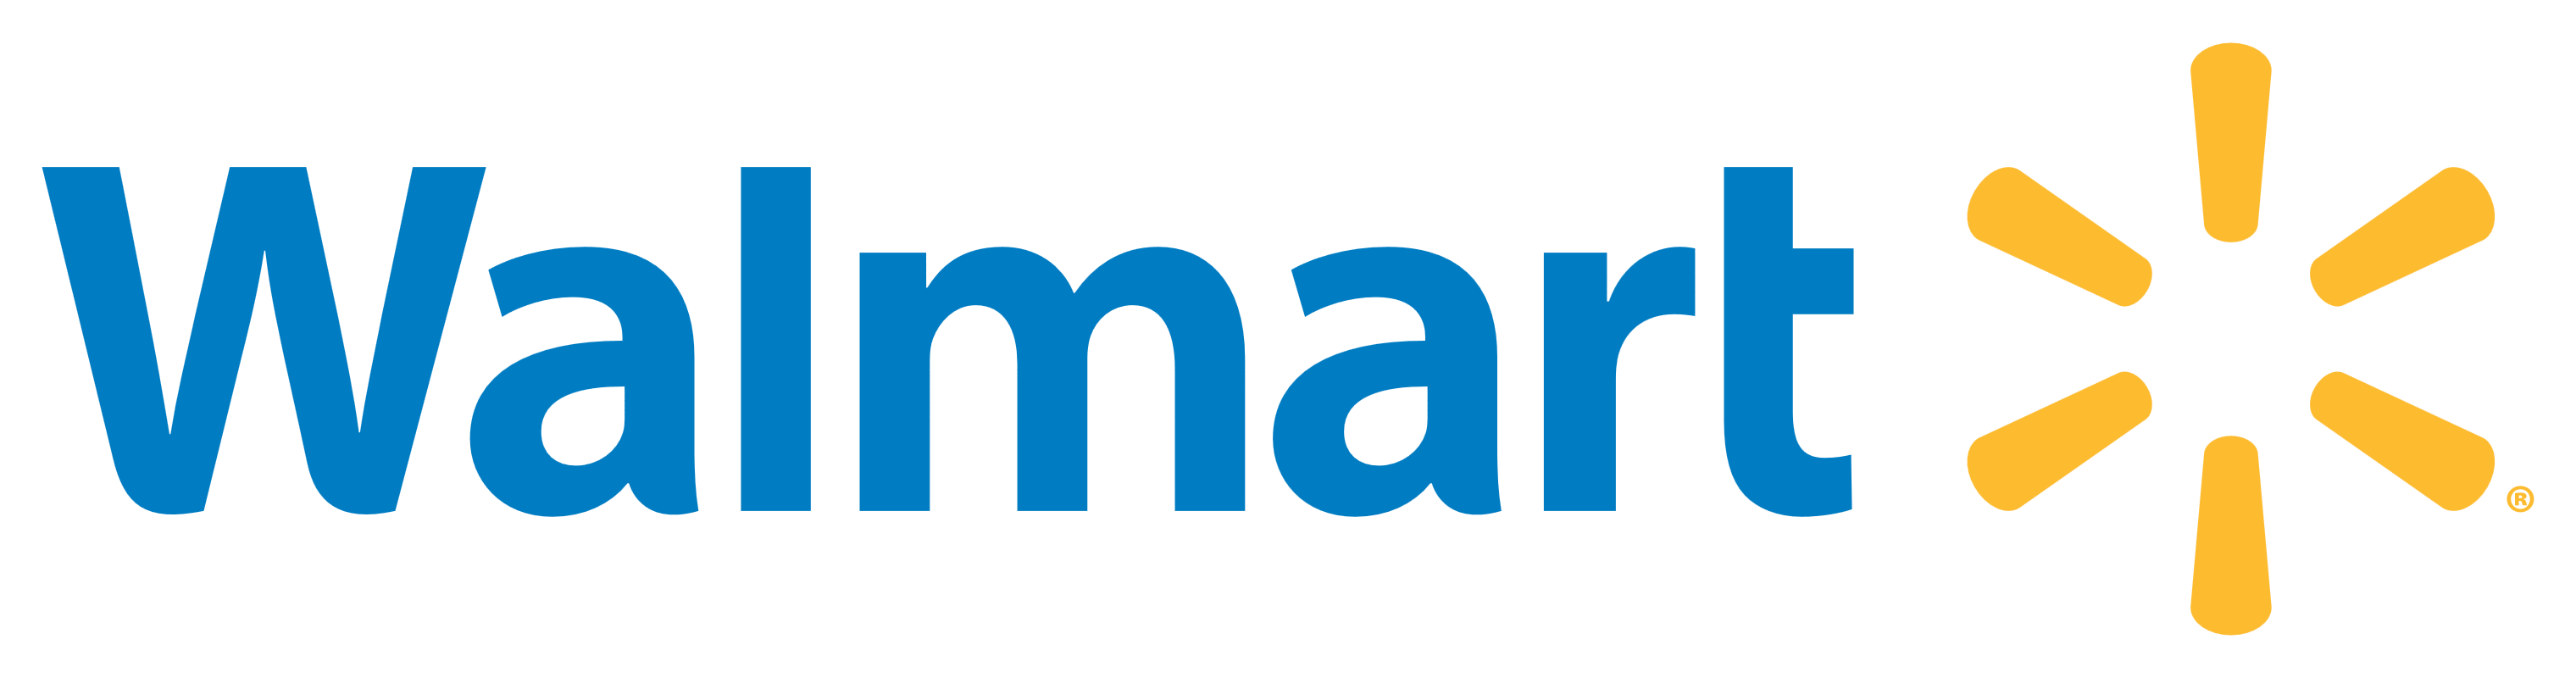

## **1. Introduction**
Walmart stands as a global retail giant, renowned for its expansive presence and significant impact on the retail industry worldwide. Founded in 1962 by Sam Walton, Walmart began as a single discount store in Rogers, Arkansas. Over the years, it has evolved into a colossal conglomerate, dominating the retail landscape with its diverse range of products, including groceries, apparel, electronics, and more.

With its headquarters in Bentonville, Arkansas, Walmart operates a vast network of hypermarkets, department stores, and grocery stores across various countries, serving millions of customers daily. Its commitment to offering affordable prices and a wide assortment of goods has solidified its position as a household name.

Walmart's success extends beyond its physical stores. The company has embraced e-commerce and technological innovations, enhancing its online presence and services. Through strategic acquisitions and partnerships, it has expanded its digital footprint, providing customers with convenient online shopping experiences through its website and mobile applications.

Moreover, Walmart has continually emphasized sustainability initiatives, aiming to reduce its environmental impact and promote social responsibility. Its initiatives include renewable energy investments, waste reduction programs, and efforts to improve supply chain sustainability.

As a retail powerhouse, Walmart's influence spans not only in sales but also in shaping industry trends and standards. Its strategies, innovations, and socio-economic impact make Walmart a significant player in the global retail sphere.

### **1.1. Business Problem Statements**
At present, Walmart is facing several intricate business challenges that necessitate the expertise of a proficient data analyst capable of conducting comprehensive analyses across multiple crucial domains. Specifically, the analyst is tasked with delving into the intricacies of:
1. **Customer Segment Analysis:** 
    - Understanding the diverse customer segments, discerning their distinct preferences and behaviors to refine targeted marketing strategies and foster personalized shopping experiences.
2. **Product Sales Evaluation:**
    - Investigating and interpreting sales patterns across various product categories, identifying underperforming sectors, and formulating strategies to rejuvenate growth trajectories.
3. **Platform/Marketplace Assessment:**
    - Assessing the intricacies of Walmart's online platform to enhance its competitiveness in the dynamic e-commerce sphere, ensuring seamless navigation, and optimizing user experiences for heightened customer engagement.
4. **Promotion Type Optimization:**
    - Strategizing and fine-tuning diverse promotional approaches by meticulously analyzing their effectiveness, experimenting with innovative campaigns, and leveraging customer feedback to enhance engagement and drive sales.
5. **Business Performance Review:** 
    - Conducting a holistic review of Walmart's overall business performance, scrutinizing operational efficiency, cost management, and financial metrics to unearth areas for enhancement and innovation, ensuring sustained growth and market resilience.

In summary, the data analyst's role extends across these pivotal realms, demanding meticulous scrutiny, analytical acumen, and innovative thinking to drive Walmart's strategic evolution and fortify its competitive edge in the dynamic retail landscape.


### **1.2. Project Goals**
The overarching goals of this project are centered on augmenting Walmart's profitability through a detailed analysis across several key domains

## **2. Data Understanding**
Supermarket Customers dataset has 2240 rows and 28 columns

### **2.1. Dataset Overview**

The following is a dataset of information from Supermarket Customers

**People**

|Column Name (People)| Description|
|----------|------------|
|ID | Customer's unique identifier|
|Year_Birth | Customer's birth year|
|Education | Customer Education Level|
|Marital_Status | Customer's marital status|
|Income | Customer's yearly household income|
|Kidhome | Number of children in customer's household|
|Teenhome | Number of teenagers in customer's household|
|Dt_Customer | Date of customer's enrollment with the company|
|Recency | Number of days since customer's last purchase|
|Complain | 1 if the customer complained in the last 2 years, 0 otherwise|

**Products**

|Column Name (Product)| Description|
|----------|------------|
|MntWines | Amount spent on wine in last 2 years|
|MntFruits | Amount spent on fruits in last 2 years|
|MntMeatProducts | Amount spent on meat in last 2 years|
|MntFishProducts | Amount spent on fish in last 2 years|
|MntSweetProducts | Amount spent on sweets in last 2 years|
|MntGoldProds | Amount spent on gold in last 2 years| 

**Promotion**

|Column Name (Promotion)| Description|
|----------|------------|
|NumDealsPurchases | Number of purchases made with a discount|
|AcceptedCmp1 | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise|
|Response | 1 if the customer accepted the offer in the last campaign, 0 otherwise|


**Place**

|Column Name (Place)| Description|
|----------|------------|
|NumWebPurchases | Number of purchases made through the company’s website|
|NumCatalogPurchases | Number of purchases made using a catalog|
|NumStorePurchases | Number of purchases made directly in stores|
|NumWebVisitsMonth | Number of visits to the company’s website in the last month|

### **2.2. Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates

# import warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### **2.3. Load Dataset**

In [2]:
pd.set_option("display.max_columns", None)

df=pd.read_csv("Supermarket Customers.csv", sep = "\t")
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


### **2.4. Dataset Information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
df.sort_values("Year_Birth").head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,3,11,0
1150,1453,1943,PhD,Widow,57513.0,0,0,06-07-2013,59,735,40,183,52,20,30,2,9,3,13,6,0,0,0,0,0,0,3,11,0
415,7106,1943,PhD,Married,75865.0,0,0,31-03-2014,73,483,0,591,156,0,12,1,3,5,10,1,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,3,11,1
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,1,3,11,0
1923,4994,1943,Master,Single,77598.0,0,0,01-10-2013,53,1193,33,281,129,66,33,1,7,5,13,3,0,0,1,0,0,0,3,11,0


In [6]:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [7]:
# Check Unique Values exist in dataset
# To show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328, 984, 295, 4

In general, we can see that:
* Supermarket Customers dataset has 28 columns and 2240 rows
* The ID column should be changed to a string because no calculations are performed
* The Dt_Customer column should be changed to datetime type so that it is easier to analyze
* AcceptedCmp1 to AcceptedCmp5, Response, and Complain columns should be changed to boolean type because the value can only be 1 or 0
* The Z_CostContact and Z_Revenue columns are not related to other columns, so they can be deleted
* data in the Education and Martial_Status columns needs to be changed because there are still values that are not appropriate
* Customers who are more than 100 years old in column Year_birth are considered invalid and need to be deleted
* There're still missing values in Income, should handling that column

## **3. Data Cleaning**
* The ID column should be changed to a string because no calculations are performed
* The Dt_Customer column should be changed to datetime type so that it is easier to analyze
* AcceptedCmp1 to AcceptedCmp5, Response and Complain columns should be changed to boolean type because the value can only be 1 or 0
* The Z_CostContact and Z_Revenue columns are not related to other columns, so they can be deleted
* data in the Education and Martial_Status columns needs to be changed because there are still values that are not appropriate
* Customers who are more than 100 years old in column Year_birth are considered invalid and need to be deleted
* There're still missing values in Income, should handling that column
* Add new column 
    - "CmpParticipated", 
    - "Familymember", 
    - "Generation", 
    - "SocClass", 
    - "TotProductBuy", 
    - "TimesPurchased", 
    - "Churn"

### **3.1. Check Data Normalization and EDA**

#### **3.1.1. Boxplot**

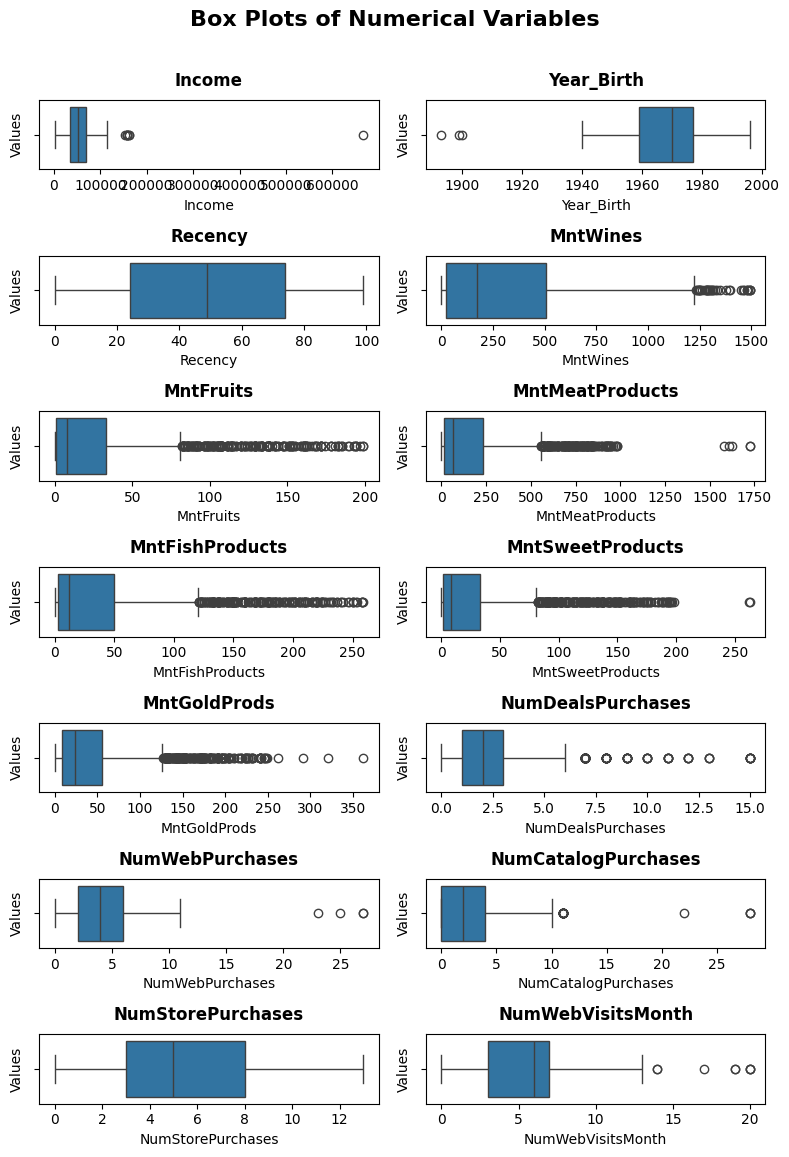

In [8]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 12))

axes = axes.flatten()

for i, col in enumerate(['Income', 'Year_Birth', 'Recency', 'MntWines',
                        'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
                        'NumStorePurchases', 'NumWebVisitsMonth']):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

#### **3.1.2. Histplot**

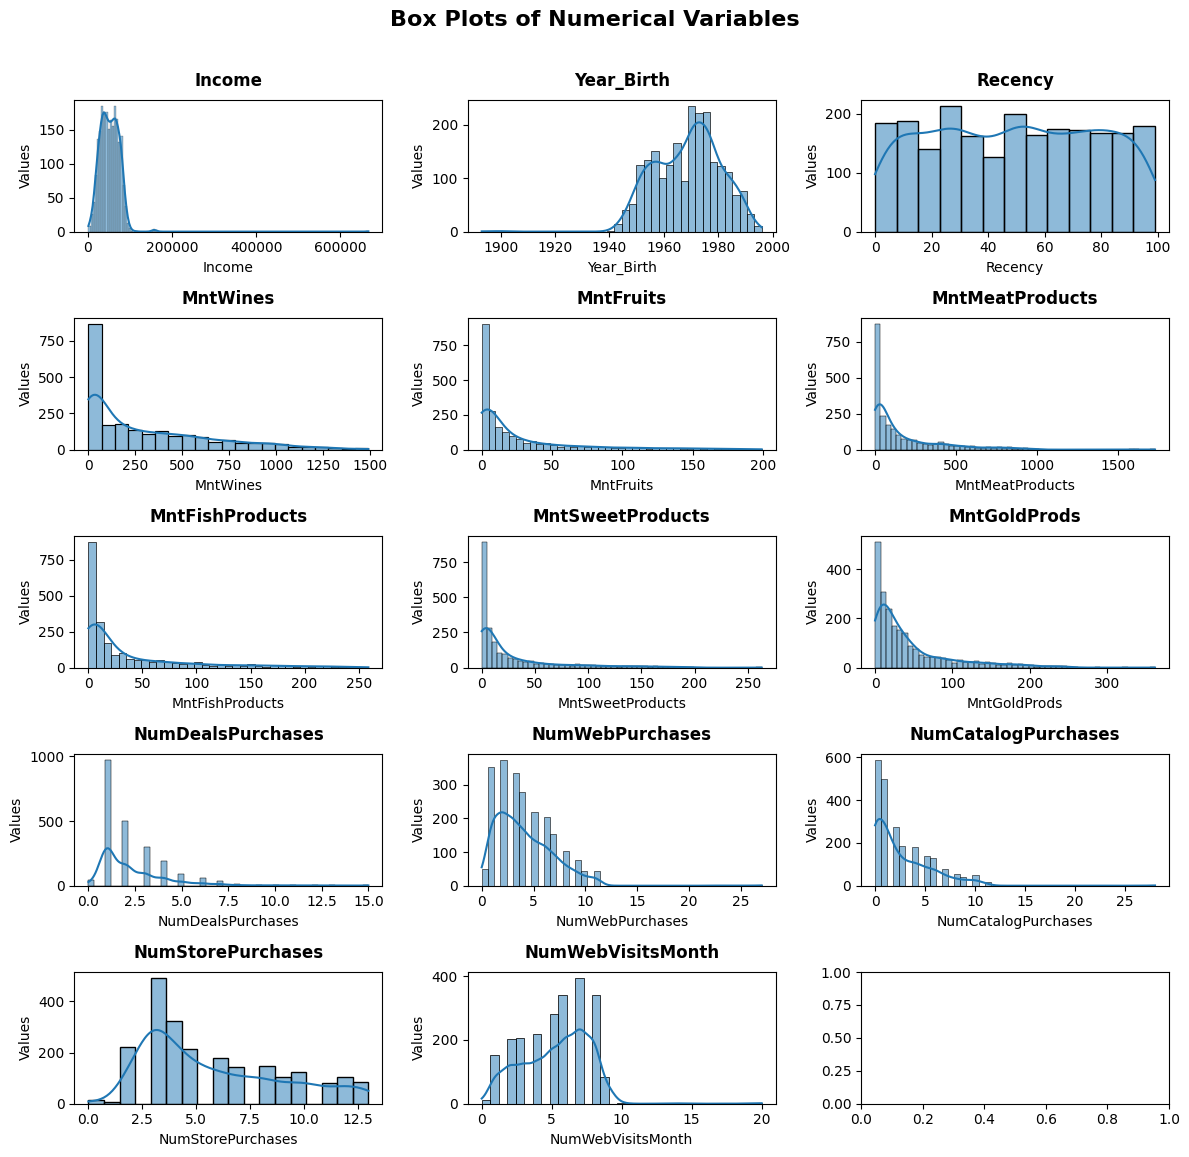

In [9]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 12))

axes = axes.flatten()

for i, col in enumerate(['Income', 'Year_Birth', 'Recency', 'MntWines',
                        'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
                        'NumStorePurchases', 'NumWebVisitsMonth']):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Values')

plt.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.02, 1, 0.97])
plt.show()

Based on the boxplot and histplot above, it can be concluded that the data has many outliers and is included in the right skewed category

### **3.2. Data Type Changing**

#### **3.2.1. Change ID type to string**

In [10]:
df["ID"] = df["ID"].astype(str)

#### **3.2.2. Change Dt_Customer type to datetime**

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

#### **3.2.3. Change Complain to boolean**

In [12]:
df["Complain"] = df["Complain"].astype(bool)

#### **3.2.4. Check Info**
check datatype of the columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

All data type already changed

### **3.3. Duplicate Data**
Check duplicate data in the dataset

In [14]:
df.duplicated().sum()

0

There's no duplicated data in data set, so we don't need to drop duplicated

### **3.4. Drop Unused Columns**
The Z_CostContact and Z_Revenue columns are not related to other columns, so they can be drop

In [15]:
# drop Z_CostContact
df = df.drop(columns="Z_CostContact")

# drop Z_Revenue
df = df.drop(columns="Z_Revenue")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,False,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,False,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,False,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,False,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,False,0


### **3.5. Fill in Incorrect Data and Missing Values**

#### **3.5.1. Education**

In [16]:
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Change "2n Cycle" to "Master"

In [17]:
df["Education"].replace("2n Cycle", "Master", inplace=True)

In [18]:
df["Education"].value_counts()

Education
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64

Bsic Education can be drop

In [19]:
df = df[~(df["Education"]=="Basic")]

#### **3.5.2. Martial_Status**

**Classification of Legal Marital Status**
1. Married 

2. Widowed 

3. Together

4. Divorced

5. Single

source: https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=61748&CVD=61748&CLV=0&MLV=1&D=1


In [20]:
df["Marital_Status"].value_counts()

Marital_Status
Married     844
Together    566
Single      462
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

- Change "Widow" to "Widowed"
- Change "Absurd" to "Together"
- Change "YOLO" to "Divorced"
- Change "Alone" to "Single"

In [21]:
df["Marital_Status"].replace("Widow", "Widowed", inplace=True)
df["Marital_Status"].replace("Absurd", "Together", inplace=True)
df["Marital_Status"].replace("YOLO", "Divorced", inplace=True)
df["Marital_Status"].replace("Alone", "Single", inplace=True)

#### **3.5.3. Year_Birth**

Removes ages older than 100 years from the Year_Birth column

<Axes: xlabel='Year_Birth'>

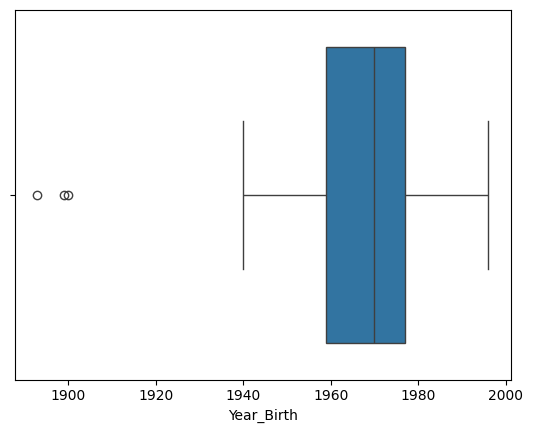

In [22]:
sns.boxplot(data=df, x="Year_Birth")

In [23]:
df["Year_Birth"].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1976,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940])

In [24]:
df[["Year_Birth"]].sort_values("Year_Birth").head()

,Year_Birth
239,1893
339,1899
192,1900
1950,1940
424,1941


In [25]:
df = df[df["Year_Birth"]>1900]

#### **3.5.4. Income**
Fill the income missing value

**Check Income Outliers**

<Axes: xlabel='Income'>

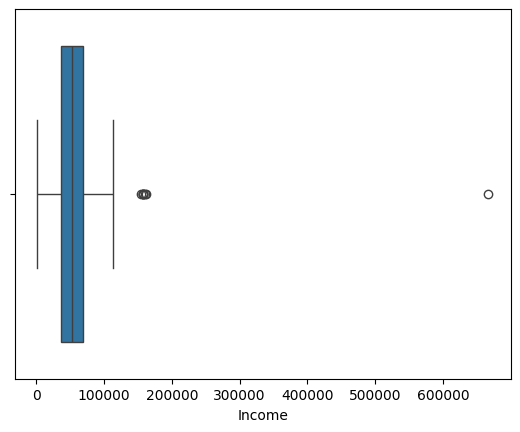

In [26]:
sns.boxplot(data=df, x="Income")

In [27]:
# Calculate the IQR for the column
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df["Income"] < lower_bound) | (df["Income"] > upper_bound)]
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,False,0
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,False,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,False,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,False,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,False,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,False,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,False,0
2233,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,False,0


**Delete Outliers**

In [28]:
df = df[~((df["Income"] < lower_bound) | (df["Income"] > upper_bound))]

**Check Income normality**

<Axes: xlabel='Income', ylabel='Count'>

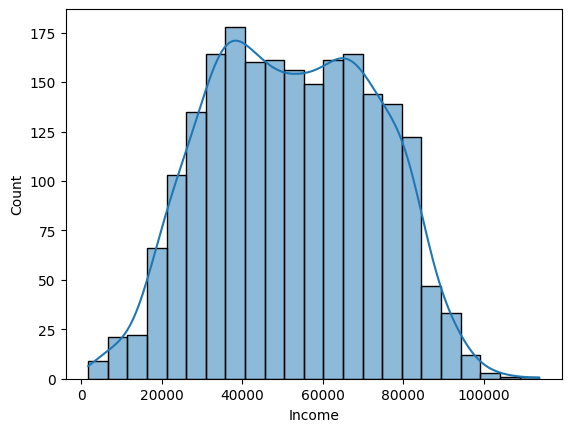

In [29]:
sns.histplot(data=df, x="Income", kde=True)

In [30]:
df["Income"].skew()

0.0007570966903920094

In [31]:
df["Income"].kurtosis()

-0.8104052761588187

column income is not normal, so we should fill with median

**Fill income missing value with Income median by Education**
- we fill in the missing values of income based on the median of education,
 because usually the higher a person's education level, the higher their income

In [32]:
df.groupby('Education')[['Income']].median()

,Income
Education,
Graduation,51948.0
Master,49588.5
PhD,55005.0


In [33]:
df["Income"] = df["Income"].fillna(df.groupby("Education")["Income"].transform("median"))

In [34]:
df["Income"].isna().sum()

0

### **3.6. Add Columns**

#### **3.6.1. Total Campaign Participated**
Add total campaign participated obtained from AcceptedCmp1 until AcceptedCmp5 and Response

In [35]:
df["CmpParticipated"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]
df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "CmpParticipated"]].head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,CmpParticipated
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [36]:
df["CmpParticipated"].value_counts()

CmpParticipated
0    1574
1     363
2     141
3      51
4      36
5      10
Name: count, dtype: int64

#### **3.6.2. Number of Family Member**
Add number of family members obtained from the Marital_Status, Kidhome, and Teenhome columns

In [37]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widowed'],
      dtype=object)

In [38]:
def numberFam(marital_status):
    if marital_status == "Together" or marital_status == "Married":
        return 2
    else:
        return 1

In [39]:
df["Familymember"] = df["Marital_Status"].apply(numberFam) + df["Kidhome"] + df["Teenhome"]
df[["Marital_Status", "Kidhome", "Teenhome", "Familymember"]].head()

,Marital_Status,Kidhome,Teenhome,Familymember
0,Single,0,0,1
1,Single,1,1,3
2,Together,0,0,2
3,Together,1,0,3
4,Married,1,0,3


In [40]:
df["Familymember"].value_counts()

Familymember
3    864
2    731
4    300
1    248
5     32
Name: count, dtype: int64

we can delete customers who have a family size of 5 because the number is too small

In [41]:
df = df[~(df["Familymember"]==5)]

#### **3.6.3. Generation**
Added age range by generation obtained from the Year_Birth column
- **Post War**: Between 1928 - 1945
- **Boomers**: Between 1946 - 19664
- **Gen X**: Between 1965 - 1980
- **Millennials**: Between 1981 - 1996
- **Gen Z**: After 1996
<br>
<br>
source: https://www.beresfordresearch.com/age-range-by-generation/

In [42]:
df["Year_Birth"].unique()

array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1976,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1990, 1947, 1993, 1994, 1941, 1944, 1995,
       1940])

In [43]:
def generation(year_birth):
    if year_birth >= 1928 and year_birth <= 1945:
        return "Post War"
    elif year_birth >= 1946 and year_birth <= 1964:
        return "Boomers"
    elif year_birth >= 1965 and year_birth <= 1980:
        return "Gen X"
    elif year_birth >= 1981 and year_birth <= 1996:
        return "Millennials"
    else:
        return "Gen Z"

In [44]:
df["Generation"] = df["Year_Birth"].apply(generation)
df[["Year_Birth", "Generation"]].head()

,Year_Birth,Generation
0,1957,Boomers
1,1954,Boomers
2,1965,Gen X
3,1984,Millennials
4,1981,Millennials


In [45]:
df["Generation"].value_counts()

Generation
Gen X          1021
Boomers         736
Millennials     362
Post War         24
Name: count, dtype: int64

we can delete customers in post war generation because the number is very small

In [46]:
df = df[~(df["Generation"]=="Post War")]

#### **3.6.4. Social Class**
Added Social Class obtained from the Income column
- **Lower Class**: Below $28,007
- **Lower Middle Class**: Between $28,008 and $55,000
- **Middle Clas**: Between $55,001 - $89,744
- **Upper Middle Class**: Between $89,745 - $149,131
- **Upper Class**: $149,132 or higher
<br>
<br>
source: https://www.fool.com/the-ascent/personal-finance/articles/does-your-income-make-you-upper-class-middle-class-or-lower-class/

In [47]:
df["Income"].unique()

array([58138., 46344., 71613., ..., 56981., 69245., 52869.])

In [48]:
def socclass(income):
    if income <= 28007:
        return "Lower Class"
    elif income >= 28008 and income <= 55000:
        return "Lower Middle Class"
    elif income >= 55001 and income <= 89774:
        return "Middle Class"
    elif income >= 89745 and income <= 149131:
        return "Upper Middle Class"
    else:
        return "Upper Class"

In [49]:
df["SocClass"] = df["Income"].apply(socclass)
df[["Income", "SocClass"]].head()

,Income,SocClass
0,58138.0,Middle Class
1,46344.0,Lower Middle Class
2,71613.0,Middle Class
3,26646.0,Lower Class
4,58293.0,Middle Class


In [50]:
df["SocClass"].value_counts()

SocClass
Middle Class          919
Lower Middle Class    886
Lower Class           270
Upper Middle Class     44
Name: count, dtype: int64

we can delete customers in Upper Middle Class because the number is very small

In [51]:
df = df[~(df["SocClass"]=="Upper Middle Class")]

#### **3.6.5. Total Product Purchased**
Add total product purchased obtained from wines, fruits, meat, fish, sweet, and gold product

In [52]:
df["TotProductBuy"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df[["MntWines",	"MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "TotProductBuy"]].sort_values("TotProductBuy", ascending=False).head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotProductBuy
1492,1259,172,815,97,148,33,2524
987,1394,22,708,89,91,182,2486
1052,1315,22,780,145,0,178,2440
1288,968,147,842,137,42,210,2346
1444,966,168,672,246,105,126,2283


<Axes: xlabel='TotProductBuy', ylabel='Count'>

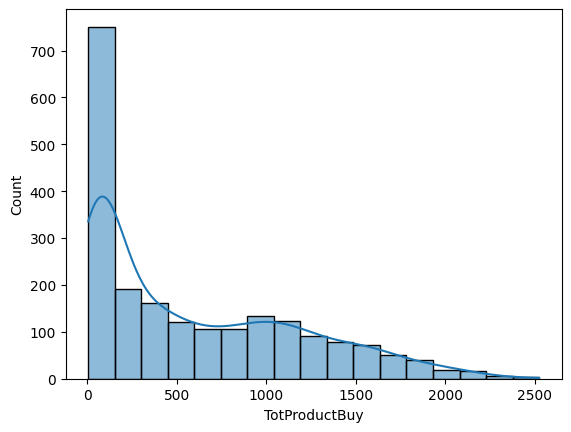

In [53]:
sns.histplot(data=df, x="TotProductBuy", kde=True)

<Axes: xlabel='TotProductBuy'>

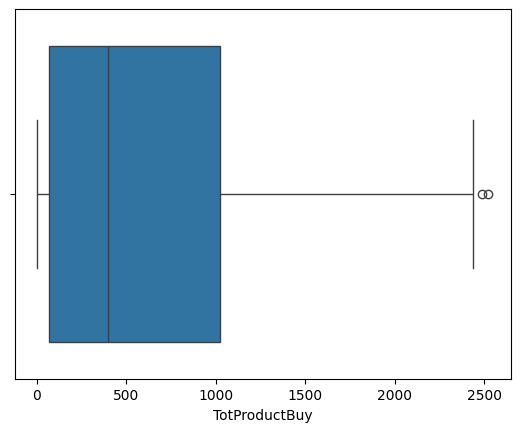

In [54]:
sns.boxplot(data=df, x="TotProductBuy")

#### **3.6.6. Times Purchased**
Add times purchased obtained from web, catalog, and store purchases

In [55]:
df["TimesPurchased"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]	
df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "TimesPurchased"]].head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,TimesPurchased
0,8,10,4,22
1,1,1,2,4
2,8,2,10,20
3,2,0,4,6
4,5,3,6,14


<Axes: xlabel='TimesPurchased', ylabel='Count'>

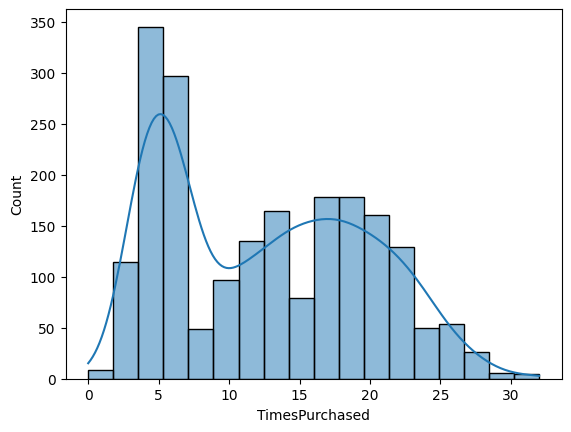

In [56]:
sns.histplot(data=df, x="TimesPurchased", kde=True)

<Axes: xlabel='TimesPurchased'>

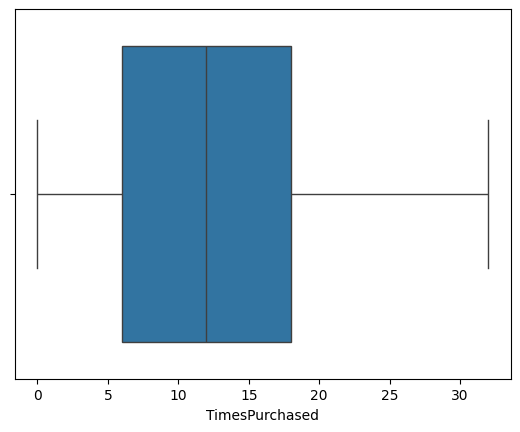

In [57]:
sns.boxplot(data=df, x="TimesPurchased")

#### **3.6.7. Churn Customer**
Add churn customer obtained from customer who have recency more than 3 months 90 days)

In [58]:
df["Churn"] = np.where(df["Recency"]>90, True, False)
df[["Recency", "Churn"]].head()

,Recency,Churn
0,58,False
1,38,False
2,26,False
3,26,False
4,94,True


In [59]:
df["Churn"].value_counts()

Churn
False    1893
True      182
Name: count, dtype: int64

## **4. Cleaned Data**
Cleaned dataset has 2075 rows and 34 columns

In [60]:
df.shape

(2075, 34)

In [61]:
df = df.reset_index().drop(columns="index")
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,CmpParticipated,Familymember,Generation,SocClass,TotProductBuy,TimesPurchased,Churn
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,False,1,1,1,Boomers,Middle Class,1617,22,False
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,False,0,0,3,Boomers,Lower Middle Class,27,4,False
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,False,0,0,2,Gen X,Middle Class,776,20,False
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,False,0,0,3,Millennials,Lower Class,53,6,False
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,False,0,0,3,Millennials,Middle Class,422,14,True


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,CmpParticipated,Familymember,Generation,SocClass,TotProductBuy,TimesPurchased,Churn
2070,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,False,0,0,3,Gen X,Lower Middle Class,30,3,False
2071,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,False,0,0,3,Gen X,Middle Class,1341,16,False
2072,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,False,0,1,1,Millennials,Middle Class,1241,18,True
2073,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,False,0,0,3,Boomers,Middle Class,843,21,False
2074,9405,1954,PhD,Married,52869.0,1,1,2012-10-15,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,False,1,1,4,Boomers,Lower Middle Class,172,8,False


In [62]:
display(df.describe(), df.describe(include="object"))

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,CmpParticipated,Familymember,TotProductBuy,TimesPurchased
count,2075.000000,2075.000000,2075.000000,2075.000000,2075,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000,2075.000000
mean,1968.946988,51445.677831,0.436145,0.520000,2013-07-10 07:22:03.759036416,49.146024,300.818313,25.784096,160.109398,36.753735,26.378795,44.390843,2.356145,4.110361,2.611566,5.840000,5.371084,0.072289,0.071325,0.058795,0.055904,0.013012,0.144096,0.415422,2.600964,594.235181,12.561928
min,1946.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000
25%,1960.000000,36070.000000,0.000000,0.000000,2013-01-17 00:00:00,24.000000,26.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,70.000000,6.000000
50%,1970.000000,51412.000000,0.000000,1.000000,2013-07-09 00:00:00,50.000000,179.000000,8.000000,67.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,397.000000,12.000000
75%,1977.000000,67432.500000,1.000000,1.000000,2013-12-30 00:00:00,74.000000,493.000000,33.000000,223.500000,48.000000,33.000000,57.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1022.500000,18.000000
max,1996.000000,89694.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,2524.000000,32.000000
std,11.320529,19535.889040,0.522534,0.536031,NaN,28.977935,328.832399,39.134398,209.958080,53.972685,40.146731,52.504746,1.880700,2.745007,2.765238,3.224102,2.395780,0.259029,0.257429,0.235298,0.229791,0.113353,0.351272,0.839567,0.857661,582.136560,7.113381


,ID,Education,Marital_Status,Generation,SocClass
count,2075,2075,2075,2075,2075
unique,2075,3,5,3,3
top,5524,Graduation,Married,Gen X,Middle Class
freq,1,1078,801,1009,919


In [63]:
df.corr(numeric_only=True)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,CmpParticipated,Familymember,TotProductBuy,TimesPurchased,Churn
Year_Birth,1.000000,-0.209072,0.250396,-0.395682,-0.016955,-0.150758,-0.006480,-0.034965,-0.022131,-0.019673,-0.058956,-0.080414,-0.137222,-0.126913,-0.136458,0.110877,0.060173,-0.069514,-0.000458,-0.018878,-0.014116,0.008703,0.017684,-0.002552,-0.088489,-0.106931,-0.164138,0.011387
Income,-0.209072,1.000000,-0.541395,0.064761,0.014305,0.716240,0.535954,0.682569,0.547365,0.539804,0.415853,-0.116074,0.481290,0.698805,0.689114,-0.630693,-0.009333,0.197979,0.351625,0.298713,0.099613,-0.031517,0.127389,0.304878,-0.289090,0.812277,0.769716,-0.000164
Kidhome,0.250396,-0.541395,1.000000,-0.099154,0.005791,-0.504955,-0.368901,-0.443528,-0.379968,-0.365787,-0.351428,0.202479,-0.369387,-0.518711,-0.509205,0.447994,0.023434,-0.152515,-0.181214,-0.167017,-0.079579,0.041278,-0.050980,-0.168108,0.545605,-0.562152,-0.574981,-0.037107
Teenhome,-0.395682,0.064761,-0.099154,1.000000,0.004577,0.027056,-0.163125,-0.265813,-0.194345,-0.141976,-0.013581,0.377229,0.179873,-0.093644,0.071880,0.115489,-0.031253,0.052552,-0.177532,-0.122600,-0.008253,-0.003491,-0.147189,-0.139537,0.567979,-0.120588,0.065588,0.007503
Recency,-0.016955,0.014305,0.005791,0.004577,1.000000,0.019442,0.008566,0.039129,0.006715,0.036042,0.016072,-0.011315,-0.006846,0.036522,0.005860,-0.029568,-0.030891,0.014309,-0.000058,-0.013319,-0.007331,-0.002086,-0.208732,-0.097127,0.006556,0.030229,0.014212,0.488767
MntWines,-0.150758,0.716240,-0.504955,0.027056,0.019442,1.000000,0.377490,0.570222,0.381067,0.372578,0.387205,0.037270,0.549950,0.665433,0.643991,-0.293342,0.074105,0.362210,0.439042,0.332128,0.222282,-0.040053,0.223196,0.471270,-0.284717,0.891858,0.762786,-0.005384
MntFruits,-0.006480,0.535954,-0.368901,-0.163125,0.008566,0.377490,1.000000,0.560719,0.596021,0.560270,0.385425,-0.123189,0.296908,0.505378,0.452651,-0.410710,0.021375,-0.003783,0.171974,0.161281,-0.022844,0.002774,0.105663,0.138900,-0.336836,0.611354,0.516196,0.005282
MntMeatProducts,-0.034965,0.682569,-0.443528,-0.265813,0.039129,0.570222,0.560719,1.000000,0.590795,0.555033,0.378297,-0.146872,0.317480,0.709873,0.510736,-0.525852,0.025157,0.072738,0.328736,0.299864,0.036569,-0.018122,0.211080,0.297522,-0.445551,0.847638,0.629956,0.023295
MntFishProducts,-0.022131,0.547365,-0.379968,-0.194345,0.006715,0.381067,0.596021,0.590795,1.000000,0.590180,0.421005,-0.127923,0.287656,0.553447,0.454720,-0.443342,-0.002451,-0.009597,0.160372,0.244398,0.005253,-0.019702,0.076082,0.140681,-0.356570,0.639790,0.532250,-0.011688
MntSweetProducts,-0.019673,0.539804,-0.365787,-0.141976,0.036042,0.372578,0.560270,0.555033,0.590180,1.000000,0.370580,-0.100328,0.331475,0.512254,0.445638,-0.415578,-0.002264,-0.008027,0.213955,0.203260,-0.010831,-0.018233,0.093090,0.149922,-0.312471,0.605412,0.529030,0.031710


In [64]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2075, 34)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,object,0,2075,"[3598, 6872]"
1,Year_Birth,int64,0,51,"[1966, 1955]"
2,Education,object,0,3,"[Graduation, Master]"
3,Marital_Status,object,0,5,"[Married, Divorced]"
4,Income,float64,0,1828,"[36921.0, 22304.0]"
5,Kidhome,int64,0,3,"[0, 2]"
6,Teenhome,int64,0,3,"[0, 2]"
7,Dt_Customer,datetime64[ns],0,656,"[2014-05-29T00:00:00.000000000, 2014-01-03T00:00:00.000000000]"
8,Recency,int64,0,100,"[49, 55]"
9,MntWines,int64,0,742,"[495, 317]"


**Export Clean csv**

In [65]:
df.to_csv("Clean_Supermarket Customers.csv")

## **5. Data Analysis**


### **5.1. Customer Segment**

#### **5.1.1. Generation**

##### **Analysis**

**Show Generation value counts in bar chart**

In [66]:
df["Generation"].value_counts()

Generation
Gen X          1009
Boomers         722
Millennials     344
Name: count, dtype: int64

In [67]:
generation = {
    "Generation": df["Generation"].value_counts().index,
    "Total": df["Generation"].value_counts().values
}
df_generation = pd.DataFrame(generation)
df_generation

,Generation,Total
0,Gen X,1009
1,Boomers,722
2,Millennials,344


Text(0.5, 1.0, 'Customer Generation')

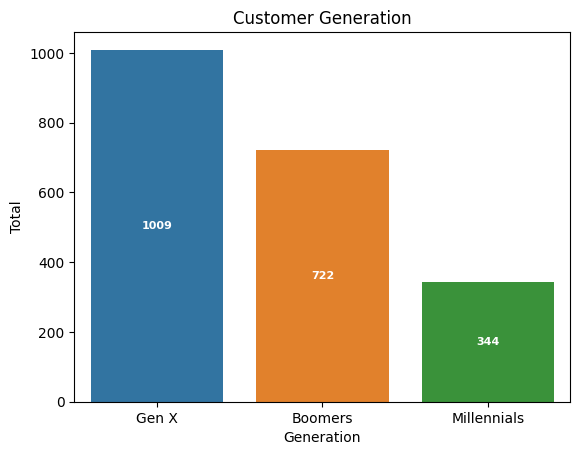

In [68]:
plots = sns.barplot(data= df_generation, x="Generation", y="Total", hue="Generation")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Customer Generation")
    

**Insight:**
- GenX is ranked first in the customer generation at Walmart, with a total of 1033 customers.
- Next there are the boomers with a total of 730 customers.
- There are a few customers who are the millenials generation, namely 366 customers

**Shows which generation of customers shops the most at Walmart**

In [69]:
df[['Generation','TotProductBuy']].groupby('Generation').mean()

,TotProductBuy
Generation,
Boomers,688.565097
Gen X,542.697721
Millennials,547.418605


Text(0.5, 1.0, 'Average Products Bought by Customer Generation')

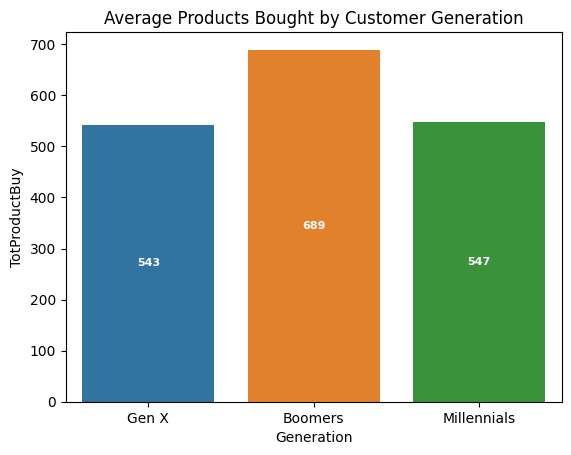

In [70]:
plots = sns.barplot(data= df.sort_values("TotProductBuy"), x="Generation", y="TotProductBuy", hue="Generation", estimator="mean", ci=0)
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Products Bought by Customer Generation")

**Insight:**
- All of the Generation are relatively balanced in the number of product purchases at Walmart.

**Shows times shopping by Customer Generation**

In [71]:
df[['Generation','TimesPurchased']].groupby('Generation').mean()

,TimesPurchased
Generation,
Boomers,14.105263
Gen X,12.000991
Millennials,10.968023


Text(0.5, 1.0, 'Average Times Shopping by Customer Generation')

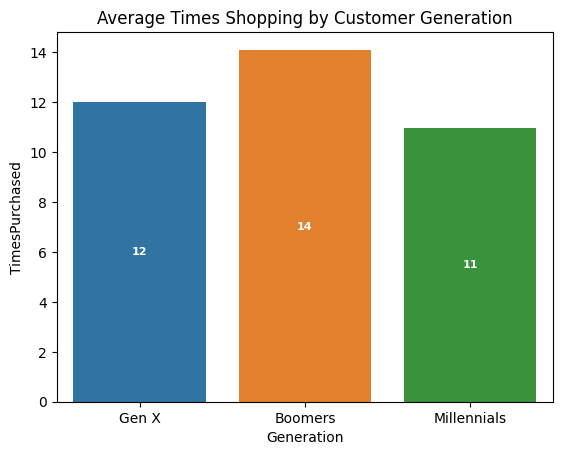

In [72]:
plots = sns.barplot(data= df.sort_values("TimesPurchased", ascending=False), x="Generation", y="TimesPurchased", hue="Generation", estimator="mean", ci=0)
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Times Shopping by Customer Generation")

**Insight:**
- All generations are relatively balanced in the times shopping at Walmart.

**Show total customer participation in campaign by generation**

In [73]:
df[['Generation','CmpParticipated']].groupby('Generation').mean()

,CmpParticipated
Generation,
Boomers,0.434903
Gen X,0.366700
Millennials,0.517442


Text(0.5, 1.0, 'Average Campaign Participation by Customer Generation')

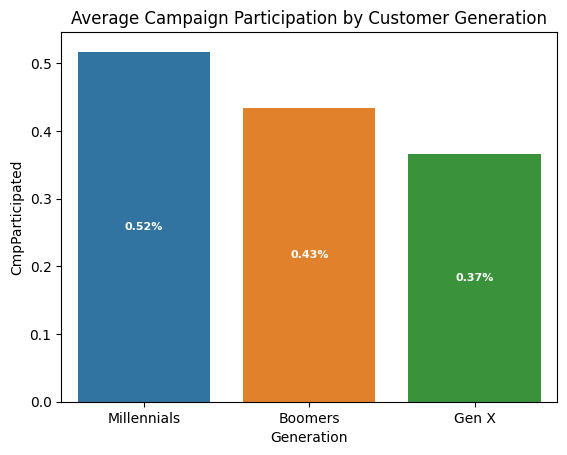

In [74]:
plots = sns.barplot(data= df.sort_values("CmpParticipated"), x="Generation", y="CmpParticipated", hue="Generation", estimator="mean", ci=0)
for p in plots.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{round(height,2)}%', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Campaign Participation by Customer Generation")

**Insight:**
- Millennials tend to receive campaigns more often than other generations

**Show total customer churn rate by generation**

In [75]:
df[['Generation','Churn']].groupby('Generation').mean()*100

,Churn
Generation,
Boomers,9.002770
Gen X,8.523290
Millennials,9.011628


Text(0.5, 1.0, 'Customer Churn Rate by Customer Generation')

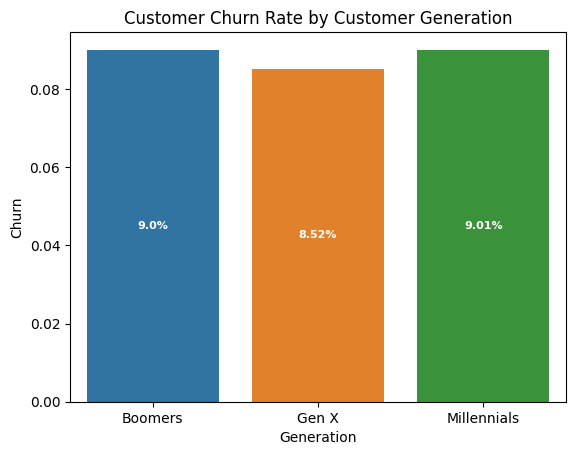

In [76]:
plots = sns.barplot(data= df.sort_values("Churn"), x="Generation", y="Churn", hue="Generation", estimator="mean", ci=0)
for p in plots.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{round(height*100,2)}%', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Customer Churn Rate by Customer Generation")

**Insight:**
- all generations are in good condition, each has a low churn rate below 10%

##### **Recap**

Text(0.5, 1.0, 'Customer Churn Rate by Customer Generation')

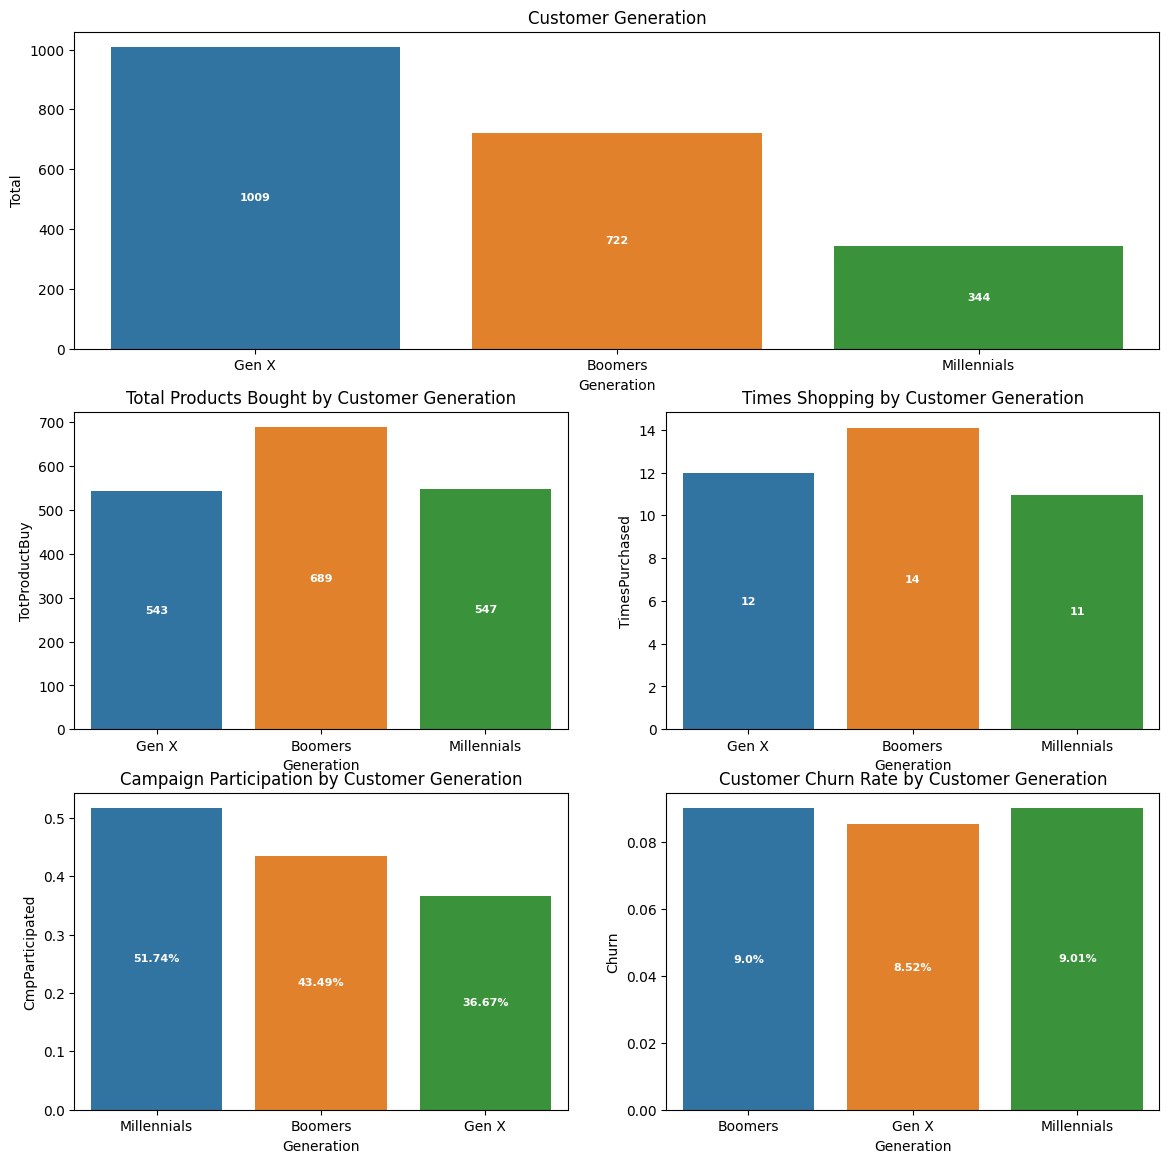

In [77]:
plt.figure(figsize=(14,14))

# Customer Generation
plt.subplot(3,1,1)
plots = sns.barplot(data= df_generation, x="Generation", y="Total", hue="Generation")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Customer Generation")



# Total Products Bought by Customer Generation
plt.subplot(3,2,3)
plots = sns.barplot(data= df.sort_values("TotProductBuy"), x="Generation", y="TotProductBuy", hue="Generation", estimator="mean", ci=0)
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Total Products Bought by Customer Generation")



# Times Shopping by Customer Generation
plt.subplot(3,2,4)
plots = sns.barplot(data= df.sort_values("TimesPurchased", ascending=False), x="Generation", y="TimesPurchased", hue="Generation", estimator="mean", ci=0)
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Times Shopping by Customer Generation")



# Campaign Participation by Customer Generation
plt.subplot(3,2,5)
plots = sns.barplot(data= df.sort_values("CmpParticipated"), x="Generation", y="CmpParticipated", hue="Generation", estimator="mean", ci=0)
for p in plots.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{round(height*100,2)}%', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Campaign Participation by Customer Generation")



# Customer Churn Rate by Customer Generation
plt.subplot(3,2,6)
plots = sns.barplot(data= df.sort_values("Churn"), x="Generation", y="Churn", hue="Generation", estimator="mean", ci=0)
for p in plots.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{round(height*100,2)}%', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Customer Churn Rate by Customer Generation")

In [78]:
df[['Generation','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','TotProductBuy']].groupby('Generation').median().reset_index().sort_values(by='TotProductBuy',ascending=False)

,Generation,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotProductBuy
0,Boomers,289.0,11.0,96.5,15.0,11.0,30.0,587.0
1,Gen X,153.0,6.0,56.0,10.0,7.0,21.0,309.0
2,Millennials,52.5,8.0,54.0,13.0,8.0,22.0,165.0


In [79]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'CmpParticipated',
       'Familymember', 'Generation', 'SocClass', 'TotProductBuy',
       'TimesPurchased', 'Churn'],
      dtype='object')

In [80]:
df[['Generation','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'CmpParticipated']].groupby('Generation').mean().reset_index().sort_values(by='CmpParticipated',ascending=False)

,Generation,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,CmpParticipated
2,Millennials,0.110465,0.052326,0.087209,0.066860,0.011628,0.517442
0,Boomers,0.055402,0.088643,0.060942,0.073407,0.016620,0.434903
1,Gen X,0.071358,0.065411,0.047572,0.039643,0.010902,0.366700


**Insight:**
- Walmart customers of all generations have an important role in Walmart's business.

#### **5.1.2. Marital Status**

##### **Analysis**

In [81]:
marital_status = {
    "Marital Status": df["Marital_Status"].value_counts().index,
    "Total": df["Marital_Status"].value_counts().values
}
df_marital_status = pd.DataFrame(marital_status)
df_marital_status

,Marital Status,Total
0,Married,801
1,Together,537
2,Single,439
3,Divorced,226
4,Widowed,72


Text(0.5, 1.0, 'Marital Status')

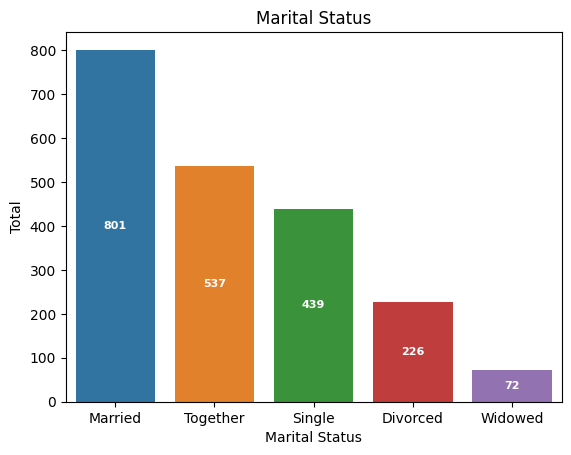

In [82]:
plots = sns.barplot(data= df_marital_status, x="Marital Status", y="Total", hue="Marital Status")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Marital Status")

**Insight:**
- The marital status category of Walmart customers with the highest number is Married, amounting to 821 customers.
- While the smallest marital status category is widowed with a total of only 73 customers.


Text(0.5, 1.0, 'Average Product Purchased by Marital Status')

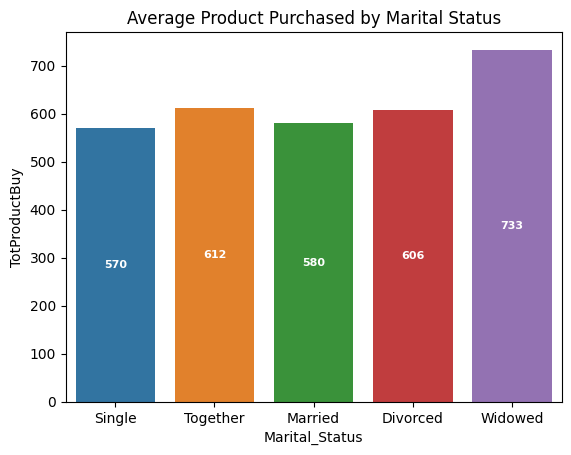

In [83]:
plots = sns.barplot(data= df, x="Marital_Status", y="TotProductBuy", hue="Marital_Status", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Purchased by Marital Status")

**Insight:**
- All categories of Walmart customer marital status have almost the same average product purchases
- Marital status does not affect the number of product purchases

Text(0.5, 1.0, 'Average Times Purchased by Marital Status')

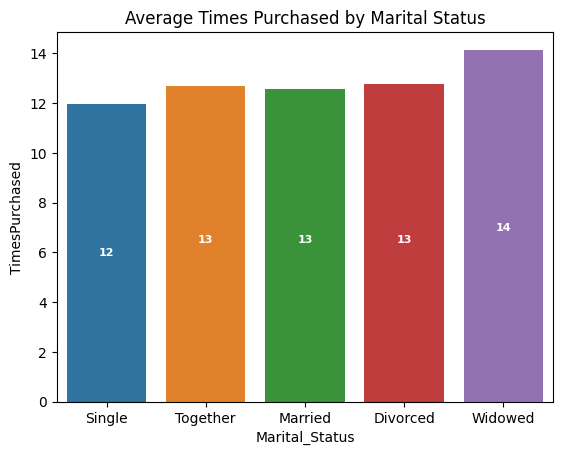

In [84]:
plots = sns.barplot(data= df, x="Marital_Status", y="TimesPurchased", hue="Marital_Status", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Times Purchased by Marital Status")

**Insight:**
- All categories of Walmart customer marital status have almost the same average times purchased
- Marital status does not affect the number of time purchased

##### **Recap**

Text(0.5, 1.0, 'Average Times Purchased by Marital Status')

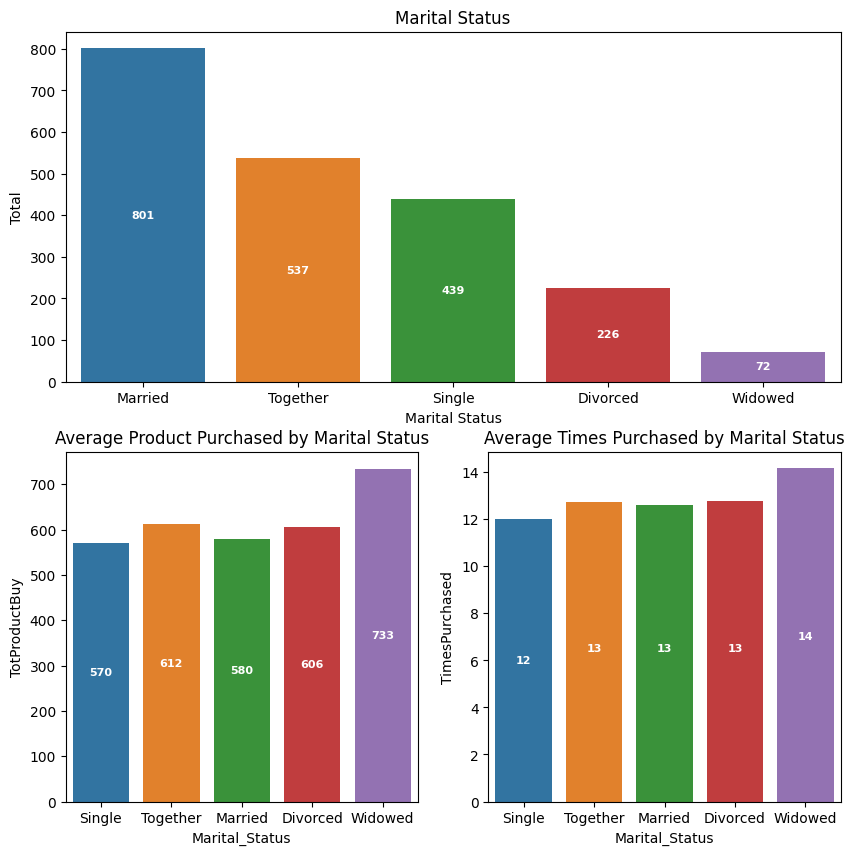

In [85]:
plt.figure(figsize=(10,10))

#
plt.subplot(2,1,1)
plots = sns.barplot(data= df_marital_status, x="Marital Status", y="Total", hue="Marital Status")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Marital Status")



#
plt.subplot(2,2,3)
plots = sns.barplot(data= df, x="Marital_Status", y="TotProductBuy", hue="Marital_Status", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Purchased by Marital Status")



#
plt.subplot(2,2,4)
plots = sns.barplot(data= df, x="Marital_Status", y="TimesPurchased", hue="Marital_Status", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Times Purchased by Marital Status")

**Insight:**
- Even though the number of marital statuses of Walmart customers varies, the average frequency of shopping and the number of products purchased are relatively the same.

#### **5.1.3. Family Member**

##### **Analysis**

In [86]:
family_member = {
    "Family Member": df["Familymember"].value_counts().index,
    "Total": df["Familymember"].value_counts().values
}
df_family_member = pd.DataFrame(family_member)
df_family_member

,Family Member,Total
0,3,864
1,2,697
2,4,299
3,1,215


Text(0.5, 1.0, 'Family Member')

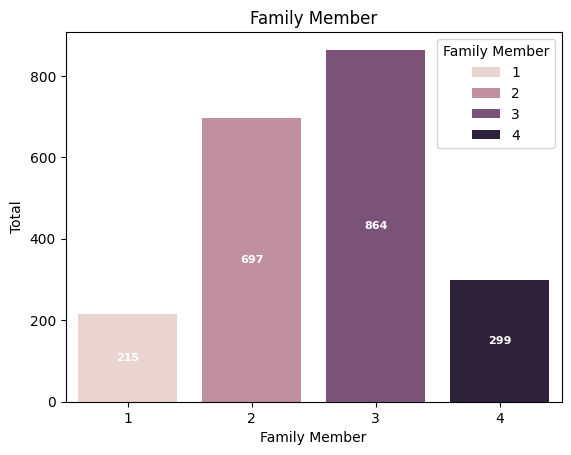

In [87]:
plots = sns.barplot(data= df_family_member, x="Family Member", y="Total", hue="Family Member")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Family Member")

**Insight:**
- Most Walmart customers have 2 or 3 family members. With 726 customers having 2 family members, and 886 customers having 3 family members.
- Meanwhile, there are only a few customers who have 1 or 4 family members. namely 218 customers with 1 family member, and 299 customers with 4 family members

Text(0.5, 1.0, 'Average Product Buy by Family Member')

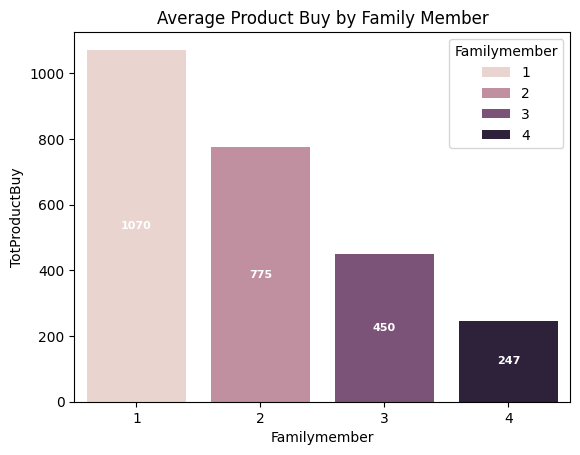

In [88]:
plots = sns.barplot(data= df, x="Familymember", y="TotProductBuy", hue="Familymember", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Buy by Family Member")

**Insight:**
- Customers who live alone tend to shop for more products than customers who have many family members.
- Customers who have 4 family members tend to buy fewer products.

Text(0.5, 1.0, 'Average Times Purchased by Family Member')

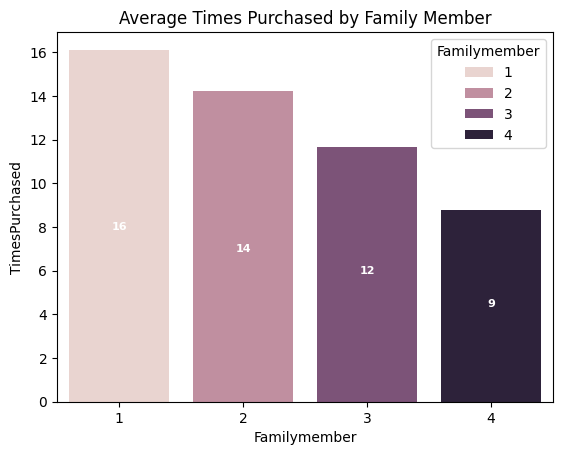

In [89]:
plots = sns.barplot(data= df, x="Familymember", y="TimesPurchased", hue="Familymember", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Times Purchased by Family Member")

**Insight:**
- Customers who live alone tend to shop more often at Walmart
- Meanwhile, customers who have more family members tend to shop less often

##### **Recap**

Text(0.5, 1.0, 'Average Times Purchased by Family Member')

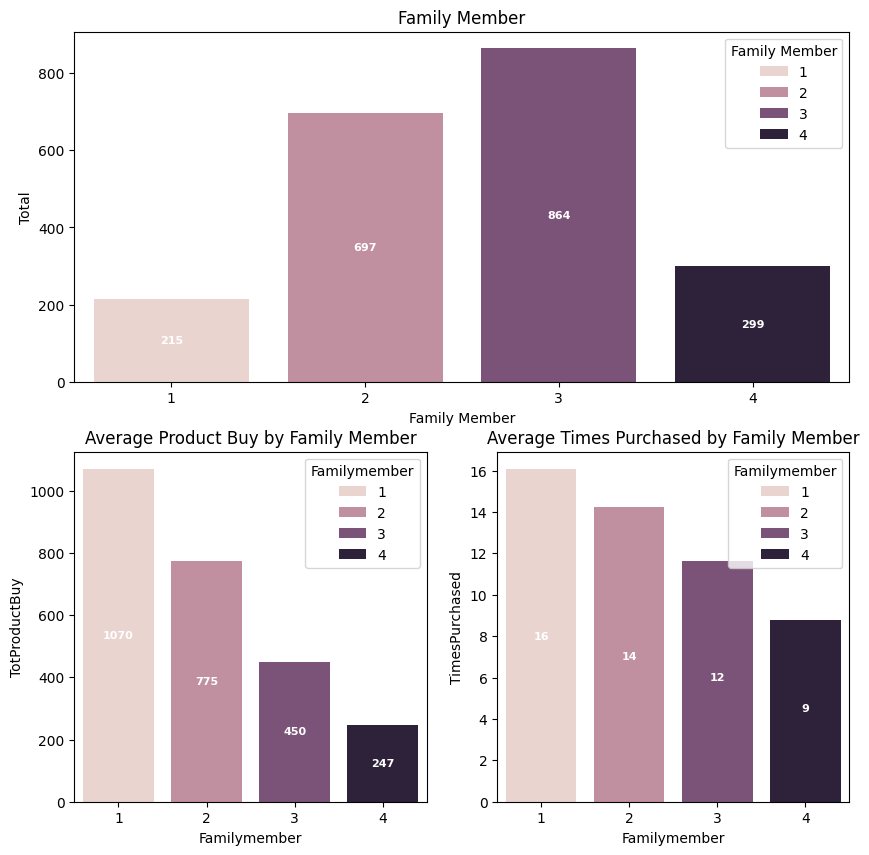

In [90]:
plt.figure(figsize=(10,10))

#
plt.subplot(2,1,1)
plots = sns.barplot(data= df_family_member, x="Family Member", y="Total", hue="Family Member")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Family Member")



#
plt.subplot(2,2,3)
plots = sns.barplot(data= df, x="Familymember", y="TotProductBuy", hue="Familymember", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Buy by Family Member")



#
plt.subplot(2,2,4)
plots = sns.barplot(data= df, x="Familymember", y="TimesPurchased", hue="Familymember", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Times Purchased by Family Member")

In [91]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'CmpParticipated',
       'Familymember', 'Generation', 'SocClass', 'TotProductBuy',
       'TimesPurchased', 'Churn'],
      dtype='object')

In [92]:
df[['Familymember', 'Kidhome',
       'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].groupby('Familymember').mean().reset_index()

,Familymember,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1,0.000000,0.000000,463.065116,52.283721,364.925581,73.288372,51.167442,65.632558
1,2,0.222382,0.296987,373.961263,35.439024,224.855093,52.020086,35.582496,53.609756
2,3,0.519676,0.641204,254.437500,17.562500,95.339120,24.469907,18.850694,39.214120
3,4,1.006689,1.063545,147.672241,7.979933,49.066890,10.391304,8.852843,22.585284


**Insight:**
- Even though the number of customers who live alone is only small, the average product sales and frequent purchases are higher than people who have more family members.

#### **5.1.4. Social Class**

##### **Analysis**

In [93]:
social_class = {
    "Social Class": df["SocClass"].value_counts().index,
    "Total": df["SocClass"].value_counts().values
}
df_social_class = pd.DataFrame(social_class)
df_social_class

,Social Class,Total
0,Middle Class,919
1,Lower Middle Class,886
2,Lower Class,270


Text(0.5, 1.0, 'Social Class')

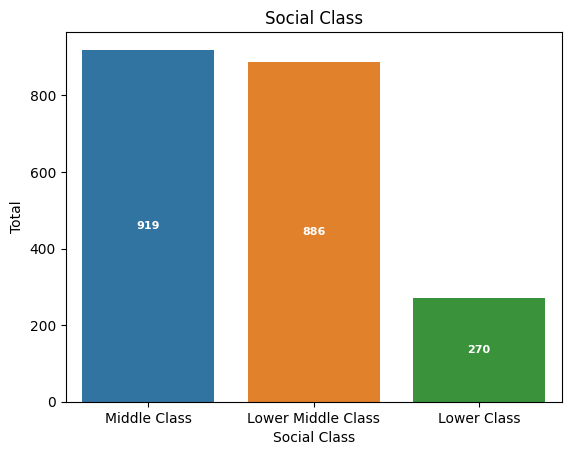

In [94]:
plots = sns.barplot(data= df_social_class, x="Social Class", y="Total", hue="Social Class")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Social Class")

Text(0.5, 1.0, 'Average Product Buy by Social Class')

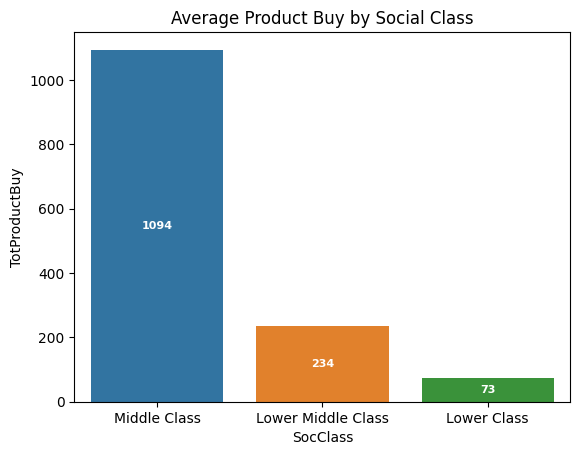

In [95]:
plots = sns.barplot(data= df, x="SocClass", y="TotProductBuy", hue="SocClass", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Buy by Social Class")

Text(0.5, 1.0, 'Average Product Buy by Social Class')

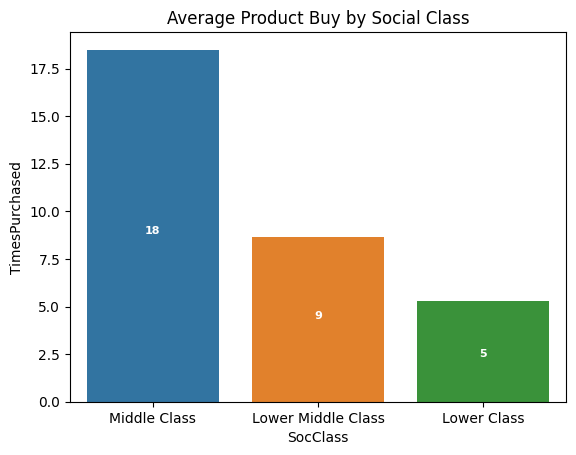

In [96]:
plots = sns.barplot(data= df, x="SocClass", y="TimesPurchased", hue="SocClass", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Buy by Social Class")

##### **Recap**

Text(0.5, 1.0, 'Average Times Purchased by Social Class')

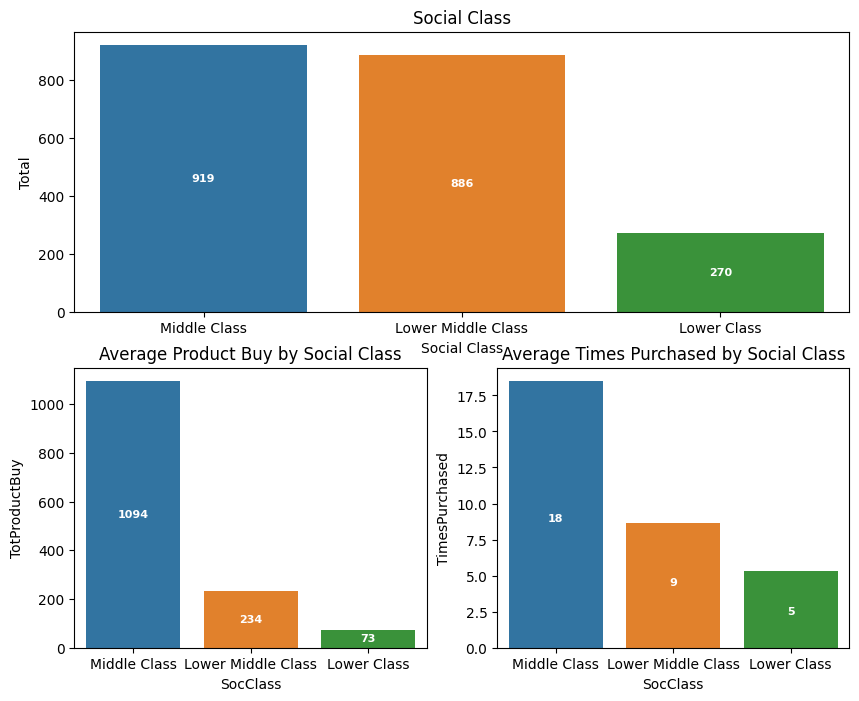

In [97]:
plt.figure(figsize=(10,8))

# 
plt.subplot(2,1,1)
plots = sns.barplot(data= df_social_class, x="Social Class", y="Total", hue="Social Class")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Social Class")



# 
plt.subplot(2,2,3)
plots = sns.barplot(data= df, x="SocClass", y="TotProductBuy", hue="SocClass", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Buy by Social Class")



#
plt.subplot(2,2,4)
plots = sns.barplot(data= df, x="SocClass", y="TimesPurchased", hue="SocClass", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Times Purchased by Social Class")

**Insight:**
- The number of customers who have the Middle Class and Lower Middle Class social classes is relatively balanced, namely 919 customers for the Middle Class and 886 for the Lower Middle Class.
- Customers with the lowest social class status are lower class, namely only 270 customers.
- However, customers who often shop and buy lots of products at Walmart are only customers from the Middle Class social class.

#### **5.1.5. Education**

##### **Analysis**

In [98]:
education = {
    "Education": df["Education"].value_counts().index,
    "Total": df["Education"].value_counts().values
}
df_education = pd.DataFrame(education)
df_education

,Education,Total
0,Graduation,1078
1,Master,546
2,PhD,451


Text(0.5, 1.0, 'Education')

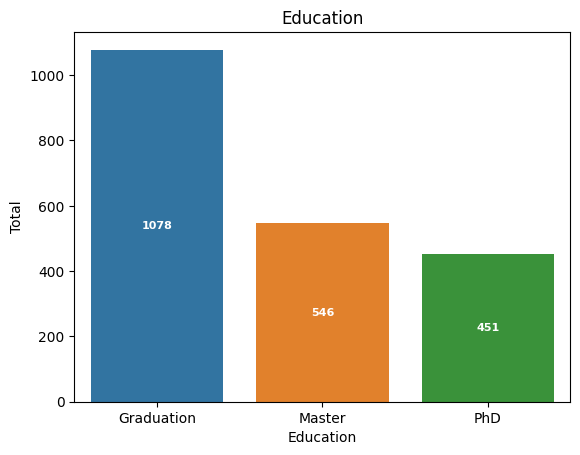

In [99]:
plots = sns.barplot(data= df_education, x="Education", y="Total", hue="Education")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Education")

Text(0.5, 1.0, 'Average Product Buy by Education')

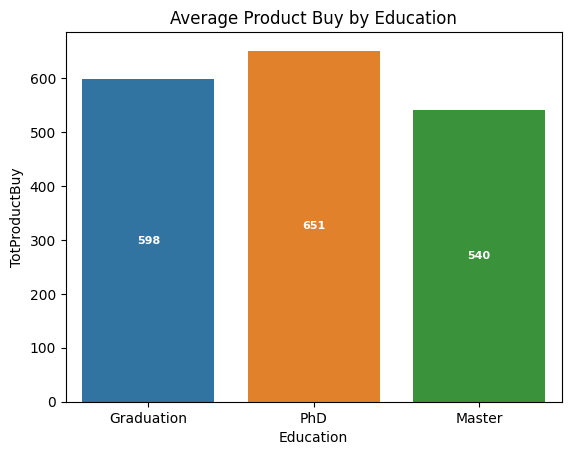

In [100]:
plots = sns.barplot(data= df, x="Education", y="TotProductBuy", hue="Education", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Buy by Education")

Text(0.5, 1.0, 'Average Product Buy by Education')

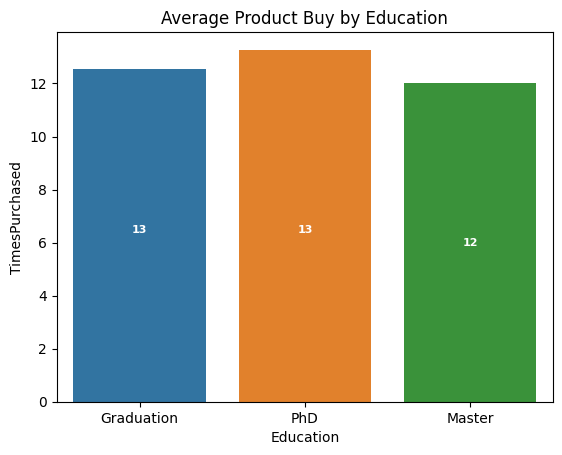

In [101]:
plots = sns.barplot(data= df, x="Education", y="TimesPurchased", hue="Education", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Buy by Education")

##### **Recap**

Text(0.5, 1.0, 'Average Product Buy by Education')

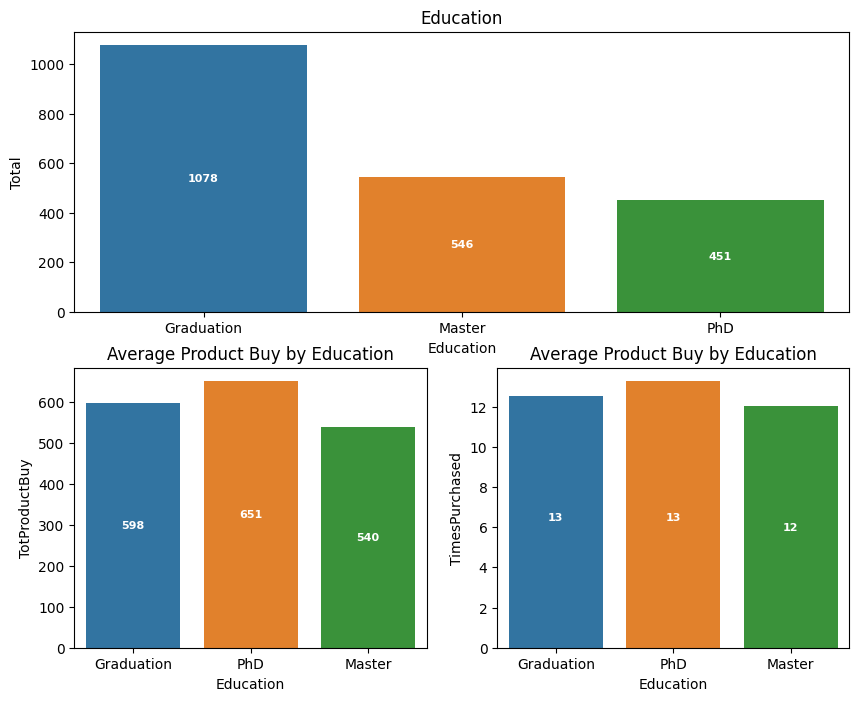

In [102]:
plt.figure(figsize=(10,8))

# 
plt.subplot(2,1,1)
plots = sns.barplot(data= df_education, x="Education", y="Total", hue="Education")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Education")



# 
plt.subplot(2,2,3)
plots = sns.barplot(data= df, x="Education", y="TotProductBuy", hue="Education", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Buy by Education")



#
plt.subplot(2,2,4)
plots = sns.barplot(data= df, x="Education", y="TimesPurchased", hue="Education", ci=0, estimator="mean")
for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title("Average Product Buy by Education")

**Insight:**
- The education level of most Walmart customers is graduation.
- However, education level does not influence frequent purchases and the number of product purchases

### **5.2. Product Sales**

#### **Analysis**

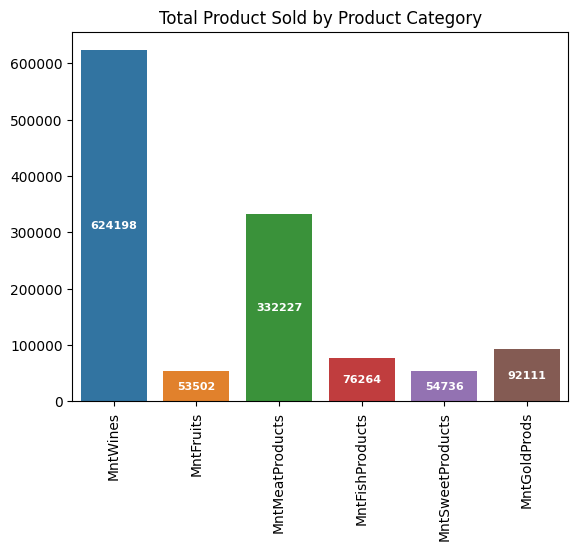

In [103]:
df_product = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

plots = sns.barplot(
    data=df_product,
    ci=0,
    estimator=np.sum
    )

for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')


plt.title('Total Product Sold by Product Category')
plt.xticks(rotation=90)
plt.show()

In [104]:
df_product_corr = df_product.corr()
df_product_corr

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
MntWines,1.000000,0.377490,0.570222,0.381067,0.372578,0.387205
MntFruits,0.377490,1.000000,0.560719,0.596021,0.560270,0.385425
MntMeatProducts,0.570222,0.560719,1.000000,0.590795,0.555033,0.378297
MntFishProducts,0.381067,0.596021,0.590795,1.000000,0.590180,0.421005
MntSweetProducts,0.372578,0.560270,0.555033,0.590180,1.000000,0.370580
MntGoldProds,0.387205,0.385425,0.378297,0.421005,0.370580,1.000000


Text(0.5, 1.0, 'Correlation between product categories')

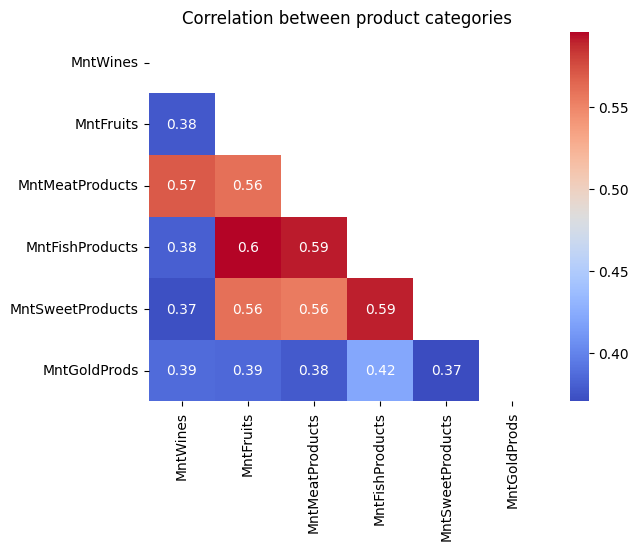

In [105]:
matrix = np.triu(df_product_corr)
sns.heatmap(
    data = df_product_corr,
    annot=True ,
    mask = matrix,
    cmap='coolwarm')
plt.title('Correlation between product categories')

#### **Recap**

Text(0.5, 1.0, 'Correlation between product categories')

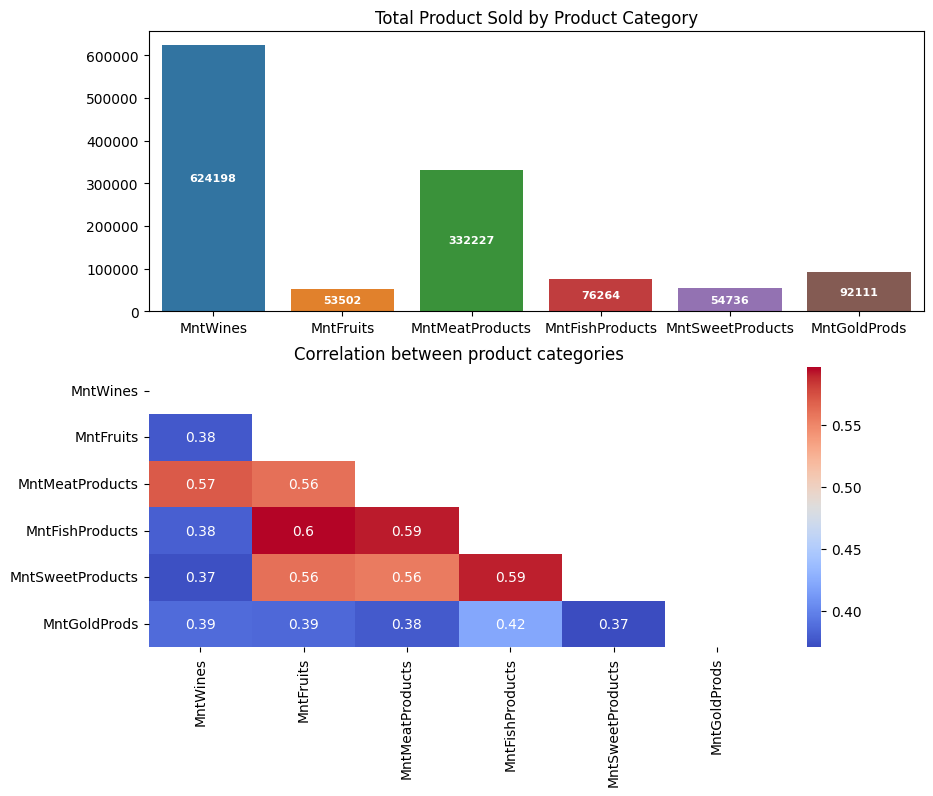

In [106]:
plt.figure(figsize=(10,8))

# 
plt.subplot(2,1,1)
df_product = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

plots = sns.barplot(
    data=df_product,
    ci=0,
    estimator=np.sum
    )

for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')
plt.title('Total Product Sold by Product Category')


# 
plt.subplot(2,1,2)
sns.heatmap(
    data = df_product_corr,
    annot=True ,
    mask = matrix,
    cmap='coolwarm')
plt.title('Correlation between product categories')

**Insight:**
- The best-selling product is wines, while the product least frequently purchased is fruits
- A fairly strong correlation occurs between:
    - fruits and fish product
    - meat and fish product
    - sweet and fish product

### **5.3. Platform/Marketplace**

In [114]:
df["NumWebPurchases"].sum()

8529

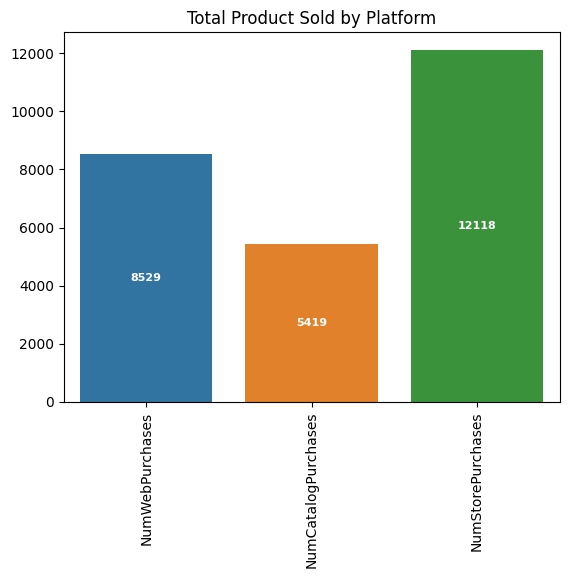

In [107]:
df_platform = df[['NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']]

plots = sns.barplot(
    data=df_platform,
    ci=0,
    estimator=np.sum
    )

for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')


plt.title('Total Product Sold by Platform')
plt.xticks(rotation=90)
plt.show()

**Insight:**
- Customers most often shop directly from stores
- The website is still quite good with a total of 8.5k customers
- Meanwhile, there are quite a few people interested in catalogs

### **5.4. Promotion Type**

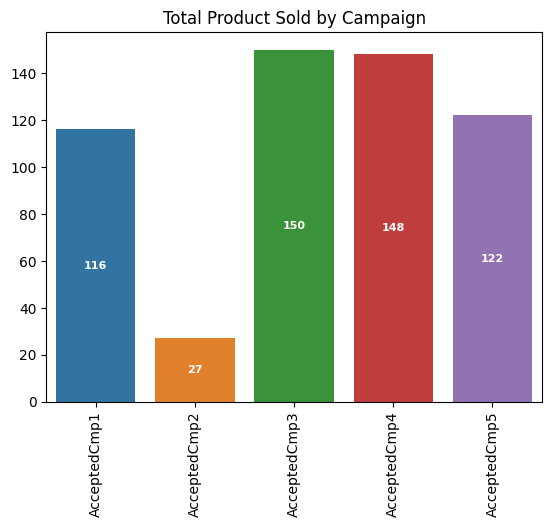

In [108]:
df_promotion = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

plots = sns.barplot(
    data=df_promotion,
    ci=0,
    estimator=np.sum
    )

for p in plots.patches:
        width, height = p.get_width(), round(p.get_height())
        x, y = p.get_xy()

        if height != 0:
            plots.annotate(f'{height}', (x + width / 2, y + height / 2),
                             ha='center', va='center', fontsize=8, color='white', fontweight='bold')


plt.title('Total Product Sold by Campaign')
plt.xticks(rotation=90)
plt.show()

**Insight:**
- Campaign no. 3 and no.4 have the most total sales compared to the others. This means that Walmart customers prefer campaign types such as campaigns 3 and 4
- And vice versa, the lowest campaign was in the second campaign, so it can be said that Walmart customers are not suitable to be given campaign method no. 2.

### **5.5. Business Performance**

#### **Analysis**

**Make Customer Enrollment Trend**

In [109]:
month = df.resample('M', on='Dt_Customer').size()

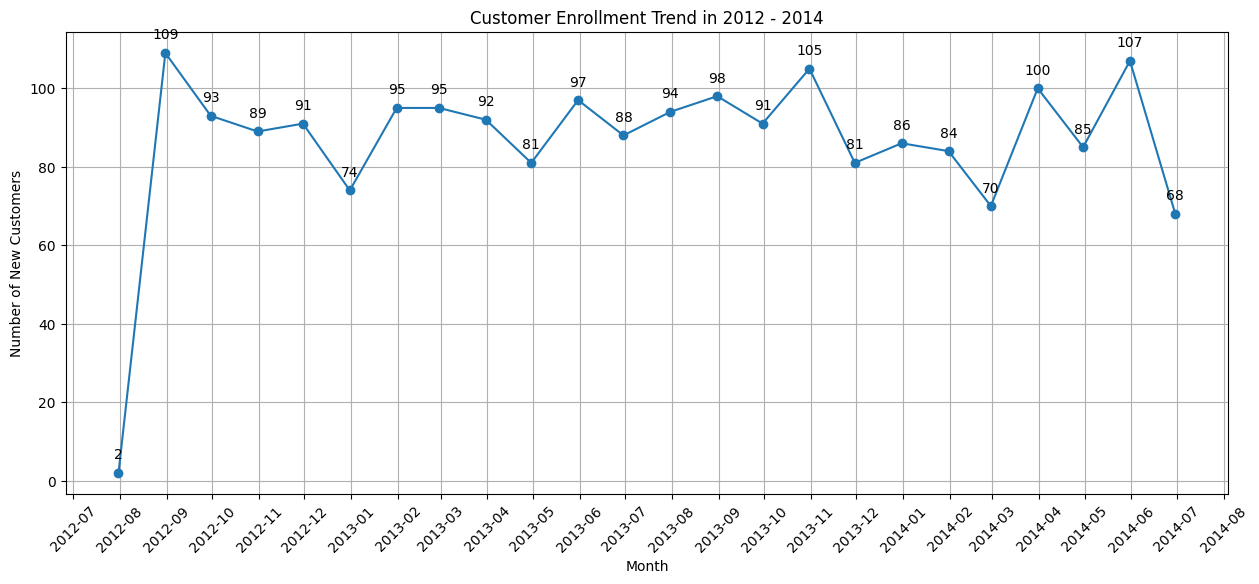

In [110]:
month_all = month.loc['2012-01-01':'2014-12-31']

plt.figure(figsize=(15,6))

plt.plot(month_all.index, month_all.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.title('Customer Enrollment Trend in 2012 - 2014')

for i, value in enumerate(month_all.values):
    plt.annotate(str(value), (mdates.date2num(month_all.index[i]), value), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(ticks=month_all.index, labels=[x.strftime('%Y-%m') for x in month_all.index], rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.grid(True)
plt.show()

**Make Customer Churn Rate Pie Chart**

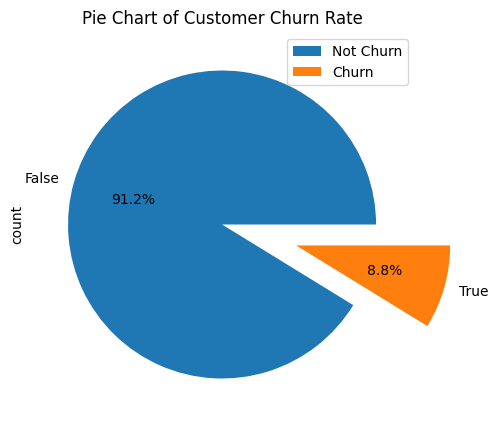

In [111]:
plt.figure(figsize=(5,5))
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=((0.00,0.5)))
plt.title('Pie Chart of Customer Churn Rate')
plt.legend(('Not Churn','Churn'))
plt.show()

**Make Customer Complain Pie Chart**

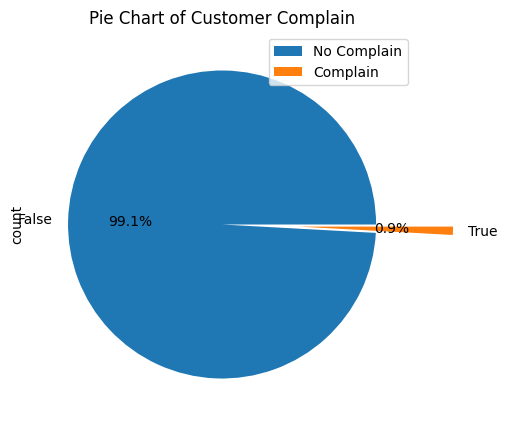

In [112]:
plt.figure(figsize=(5,5))
df['Complain'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=((0.00,0.5)))
plt.title('Pie Chart of Customer Complain')
plt.legend(('No Complain','Complain'))
plt.show()

#### **Recap**

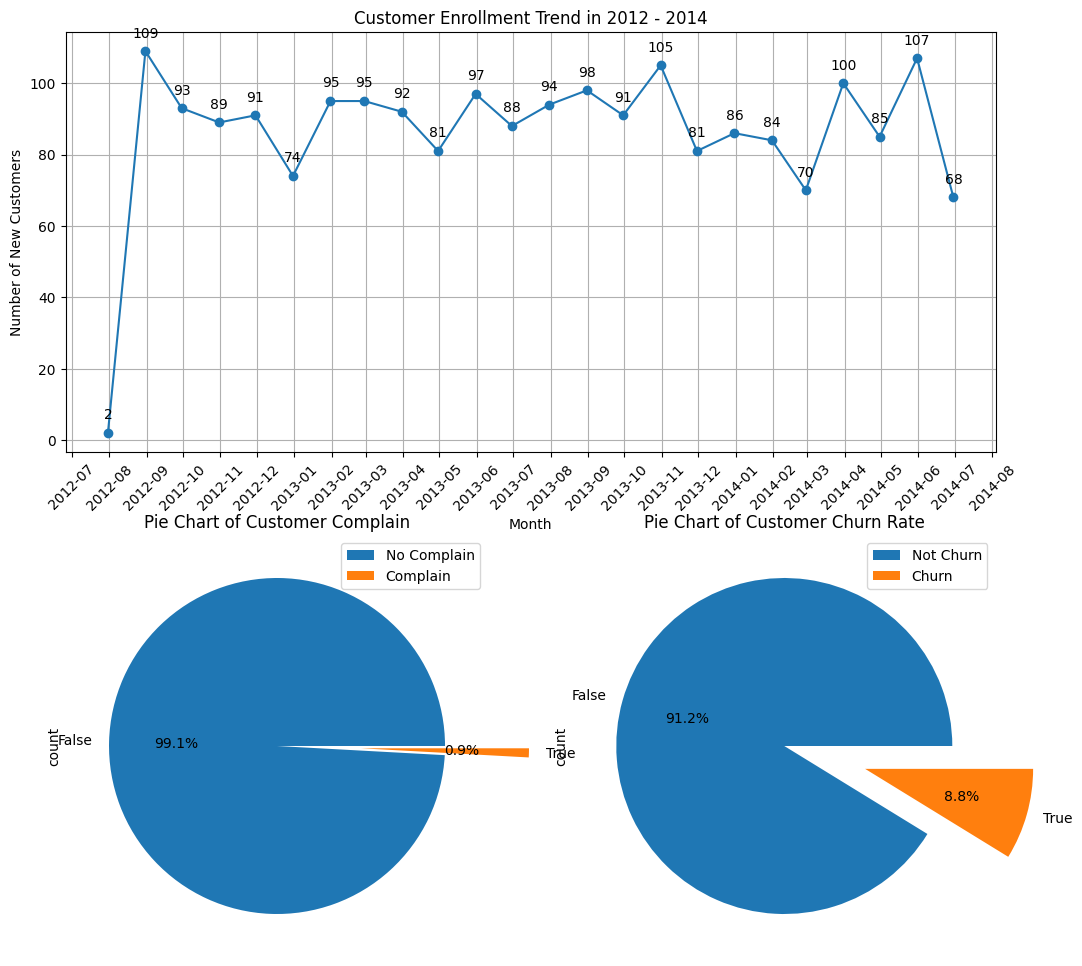

In [113]:
plt.figure(figsize=(12,12))

# 
plt.subplot(2,1,1)
month_all = month.loc['2012-01-01':'2014-12-31']

plt.plot(month_all.index, month_all.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.title('Customer Enrollment Trend in 2012 - 2014')

for i, value in enumerate(month_all.values):
    plt.annotate(str(value), (mdates.date2num(month_all.index[i]), value), textcoords="offset points", xytext=(0,10), ha='center')

plt.xticks(ticks=month_all.index, labels=[x.strftime('%Y-%m') for x in month_all.index], rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.grid(True)



# 
plt.subplot(2,2,3)
df['Complain'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=((0.00,0.5)))
plt.title('Pie Chart of Customer Complain')
plt.legend(('No Complain','Complain'))



# 
plt.subplot(2,2,4)
df['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=((0.00,0.5)))
plt.title('Pie Chart of Customer Churn Rate')
plt.legend(('Not Churn','Churn'))

**Insight:**
- It can be seen that new customers fluctuate every month, but this should not be a problem because it is still within the normal range.
- Apart from that, it can also be seen that the complaint rate is very low, namely less than 1%
- Meanwhile, the churn rate can also be said to be low because it is less than 10%

## **6. Conclusions and Recommendations** 

### **6.1. Conclusions**

1. **Customer Segment:**
    - **Generation:**
        - The largest total customer currently is Gen X.
        - The generation that shops most often and buys the most products is the boomers generation.
        - The generation that most often receives campaigns is the millennial generation.
        - In general, the distribution of generations at Walmart is good because as a percentage, all of them make frequent purchases and buy a lot of products
    - **Marital Status**:
        - Currently, most Walmart customers fall into the married category.
        - But all marital status categories do not differ significantly in terms of frequent shopping and buying a lot of products, so there is no need to segment customers based on marital status.
    - **Family Member**:
        - Walmart customers mostly have 2 and 3 family members.
        - However, the people who buy the product most often and the most are customers who live alone.
    - **Social Class**:
        - Walmart customers on average have Middle Class and Lower Middle Class social class status.
        - However, the customers who buy products often and a lot are only middle class customers.
    - **Education Level**:
        - The education level of most Walmart customers is graduation.
        - However, education level does not influence frequent purchases and the number of product purchases
2. **Product Sales**
    - The best-selling product is wines, while the product least frequently purchased is fruits
    - A fairly strong correlation occurs between:
        - fruits and fish product
        - meat and fish product
        - sweet and fish product
3. **Platform/Marketplace**
    - Customers most often shop directly from stores
    - The website is still quite good with a total of 8.5k customers
    - Meanwhile, there are quite a few people interested in catalogs
4. **Promotion Type**
    - Campaign no. 3 and no.4 have the most total sales compared to the others. This means that Walmart customers prefer campaign types such as campaigns 3 and 4
    - And vice versa, the lowest campaign was in the second campaign, so it can be said that Walmart customers are not suitable to be given campaign method no. 2.
5. **Business Performance**
    - It can be seen that new customers fluctuate every month, but this should not be a problem because it is still within the normal range.
    - Apart from that, it can also be seen that the complaint rate is very low, namely less than 1%
    - Meanwhile, the churn rate can also be said to be low because it is less than 10%

### **6.2. Recommendations**

1. Currently, the people who buy the most products are the boomers generation, even though the majority of Walmart customers are the Gen X generation. Therefore, it would be better if the GenX generation could be paid more attention to.
2. Currently, the millennial generation is the generation that receives the most campaigns. This is a good thing because the millennial generation is Walmart's future customers. Therefore, media campaign no. 3 is the most suitable because it is more in line with the interests of the millennial generation.
3. Currently, the people who buy the most products and buy the most products are people who live alone. Even though the majority of Walmart customers have 2 to 3 family members. So it would be better if we added a new product segment that focuses on household needs.
4. The majority of Walmart customers are middle class and lower middle class. However, those who buy products often and a lot are only middle class customers. Therefore, it would be better if there was a new product segment with a slightly cheaper price range to attract the attention of lower middle class customers.
5. The best-selling product liked by Walmart customers is wine, therefore we can focus on adding to the types of wine menu that we already have.
6. There are several products that have quite a high correlation, such as fruits and fish products, meat and fish products, and sweet and fish products. We can implement a bundling system for these products so that it makes it easier for customers to buy the products they want.
7. The main platform for sales at Walmart is to shop directly at the store. therefore opening a new shop outlet in a strategic location is a good idea.
8. Purchasing via the website is quite good, but it feels like it's still not optimal. It would be better to optimize the website so that it can attract more customers online.
9. Don't ever do campaign method no. 2 again because it has a bad impression on Walmart customers. it's better to use campaign method no. 3 or 4 because it is liked by many Walmart customers.
10. The customer churn rate is good because it is less than 10%, but the customer conversion rate each month is still very fluctuating. So it would be better to carry out a campaign that is targeted at finding new customers rather than user retention.




